## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from xgboost import  XGBClassifier

from sklearn import metrics, model_selection
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, f1_score, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn import over_sampling

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df = data.copy()

## Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
nums = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated',
        'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
cats = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

Pada bagian OperatingSystem, Browser, Region, dan TrafficType menggunakan tipe data integer yang tidak diketahui pilihan 1,2,3.... Seharusnya menggunakan tipe data string dan diberikan sebuah nama (Contoh: kolom Browser = 1 direpresentasikan menjadi Google, dan lain sebagainya), pada bagian ProductRelated_Duration dan Administrative_Duration tidak diketahui satuan waktu dalam satuan apa? (second, minute, hour).

In [7]:
df[nums].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [8]:
df[cats].astype('category').describe()

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3364,6601,7961,4780,3913,10551,9462,10422


## Value Counting

In [9]:
for col in cats:
    print(f'Value count kolom {col}:')
    print(df[col].value_counts())
    print()

Value count kolom Month:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Value count kolom OperatingSystems:
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Value count kolom Browser:
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Value count kolom Region:
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

Value count kolom TrafficType:
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

Value count kolom VisitorType:
Return

## Univariate Analysis

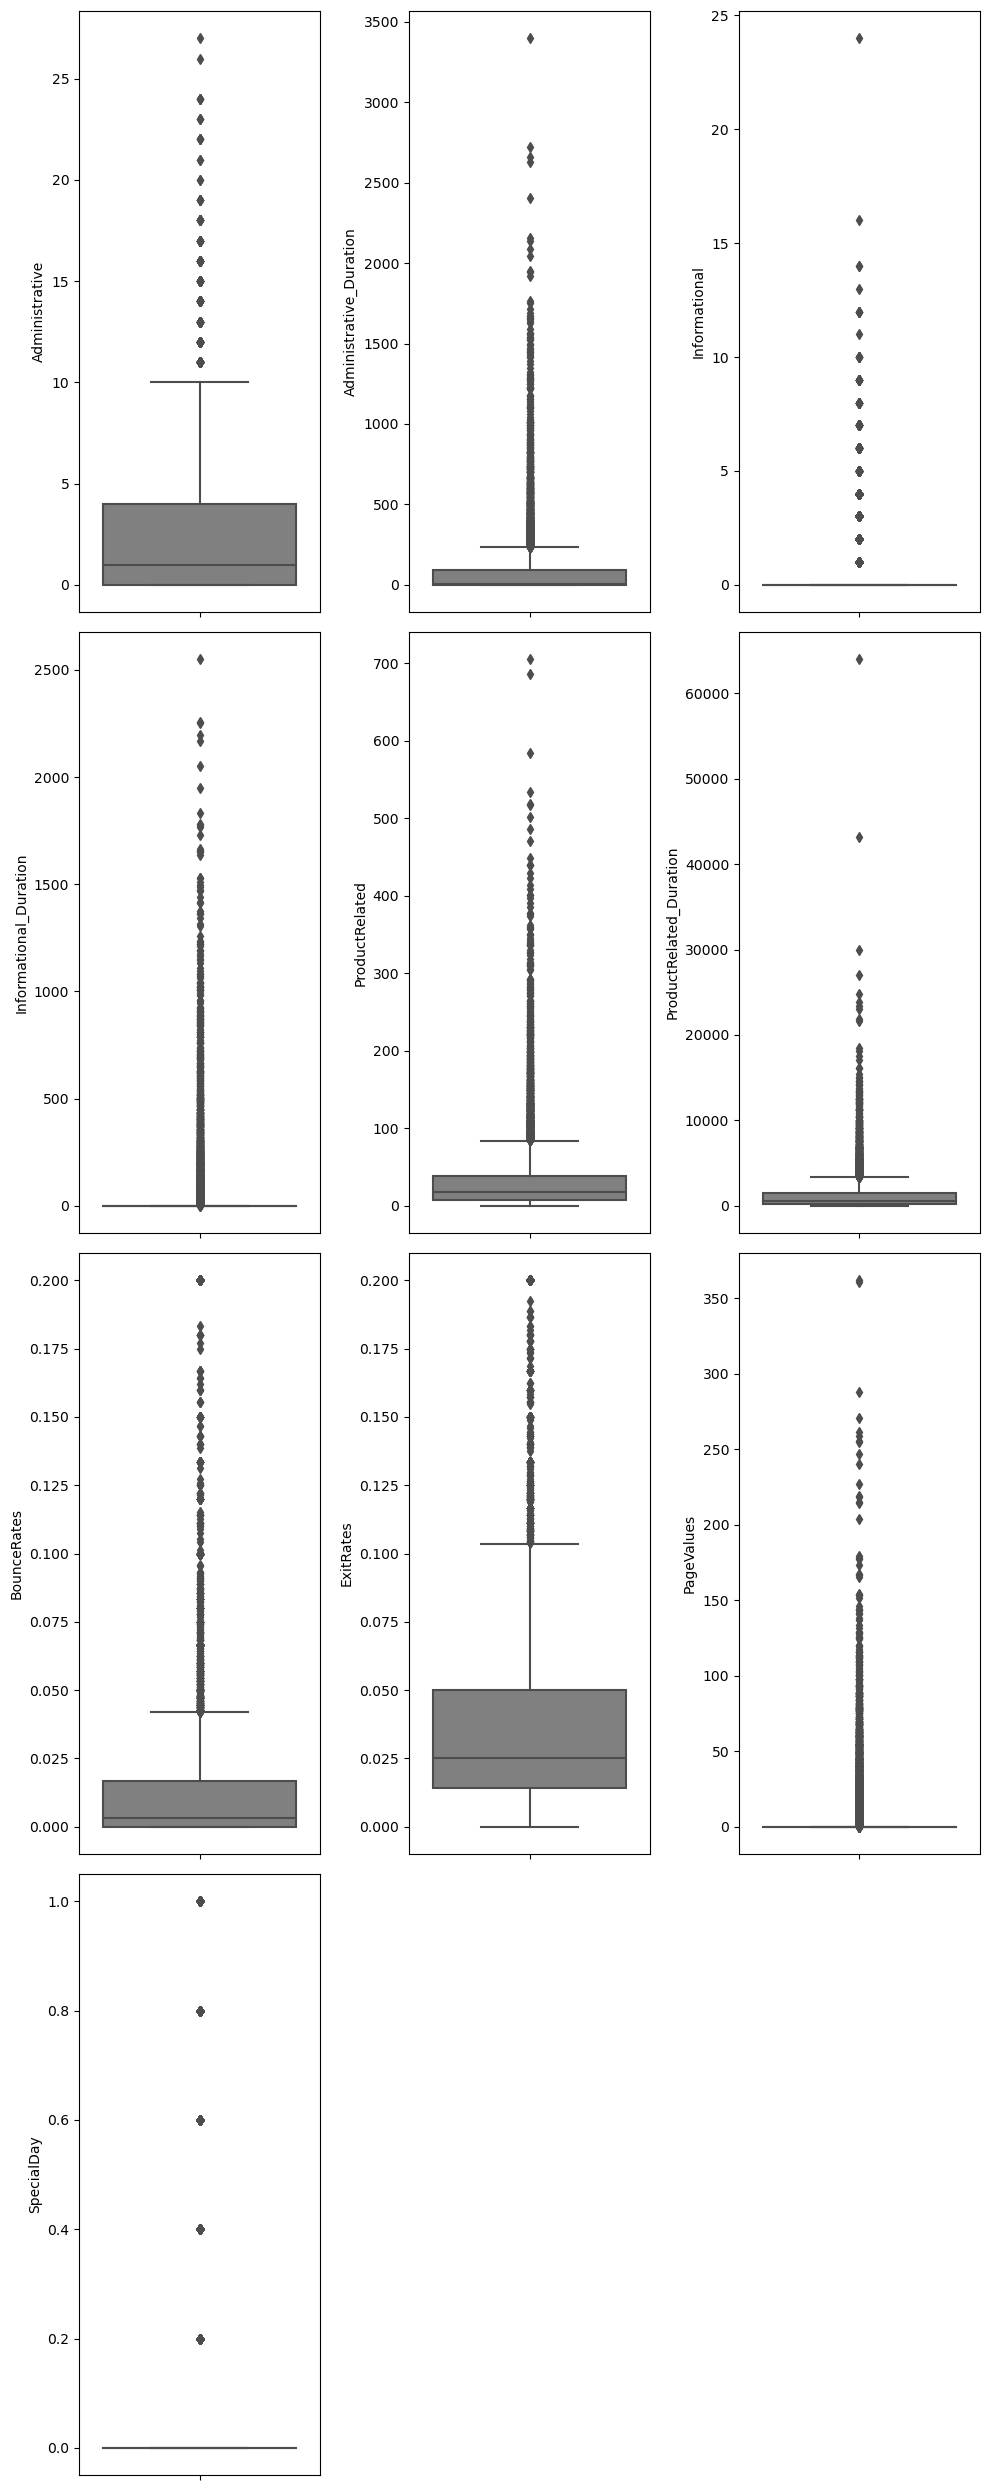

In [10]:
plt.figure(figsize = (10, 25))
for i in range(0, len(nums)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y = df[nums[i]], color = 'gray', orient = 'v')
    plt.tight_layout()

Pada boxplot diatas dapat disimpulkan bahwa semua kolom numerik memiliki outlier yang extreme, karena terdapat titik (data) yang sangat jauh dari batas outlier.

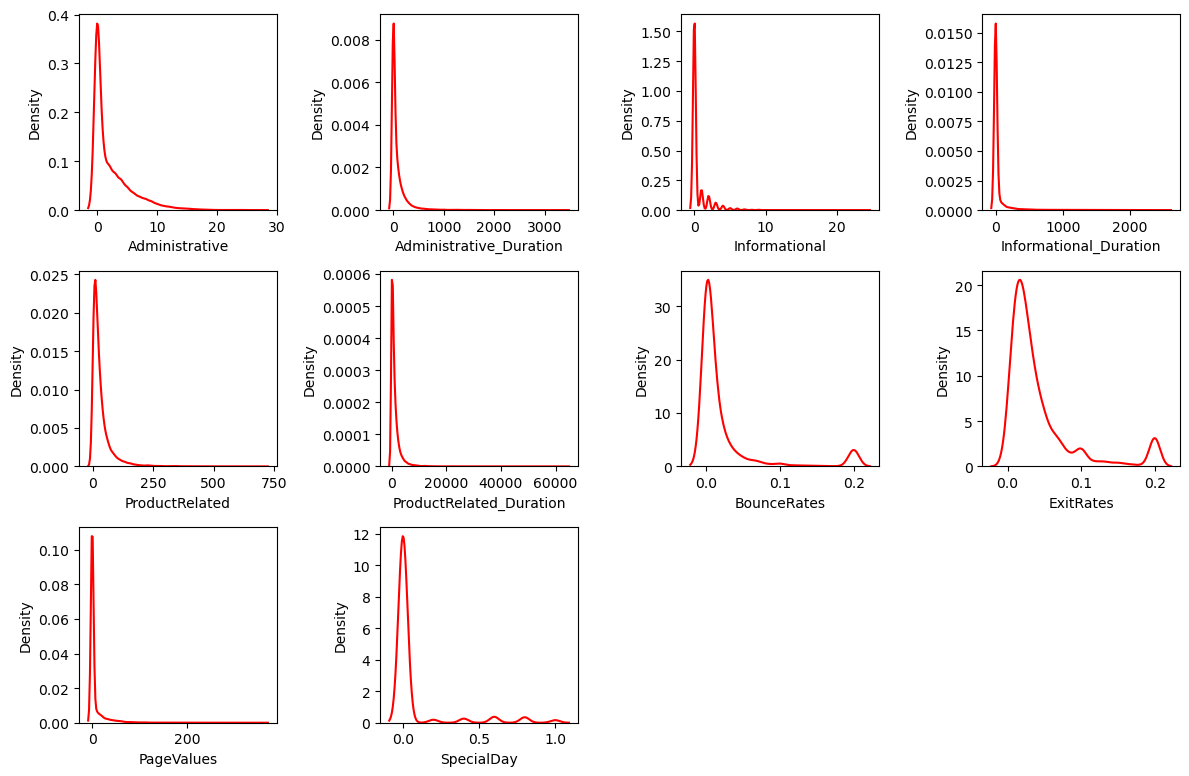

In [11]:
plt.figure(figsize = (12, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x = df[nums[i]], color = 'red')
    plt.xlabel(nums[i])
    plt.tight_layout()

Dari semua kolom numerik yang sudah diplotkan diatas dapat disimpulkan bahwa hampir semuanya berdistribusi positively skewed karena plot cenderung memiliki ekor ke kanan, dan median < mean. Untuk kolom Informational, Informational_Duration, PageValues dan SpecialDay tidak memiliki distribusi karena datanya tidak merata dan datanya banyak berada di angka 0. Hampir dari semua kolom didominasi oleh angka 0, kecuali untuk kolom ProductRelated data didominasi oleh angka 1 dan ExitRates datanya didominasi oleh angka 0.2. Lalu pada grafik juga tidak terdapat bimodal maupun multimodal, karena modus pada grafik dan data hanya berada pada 1 titik saja.

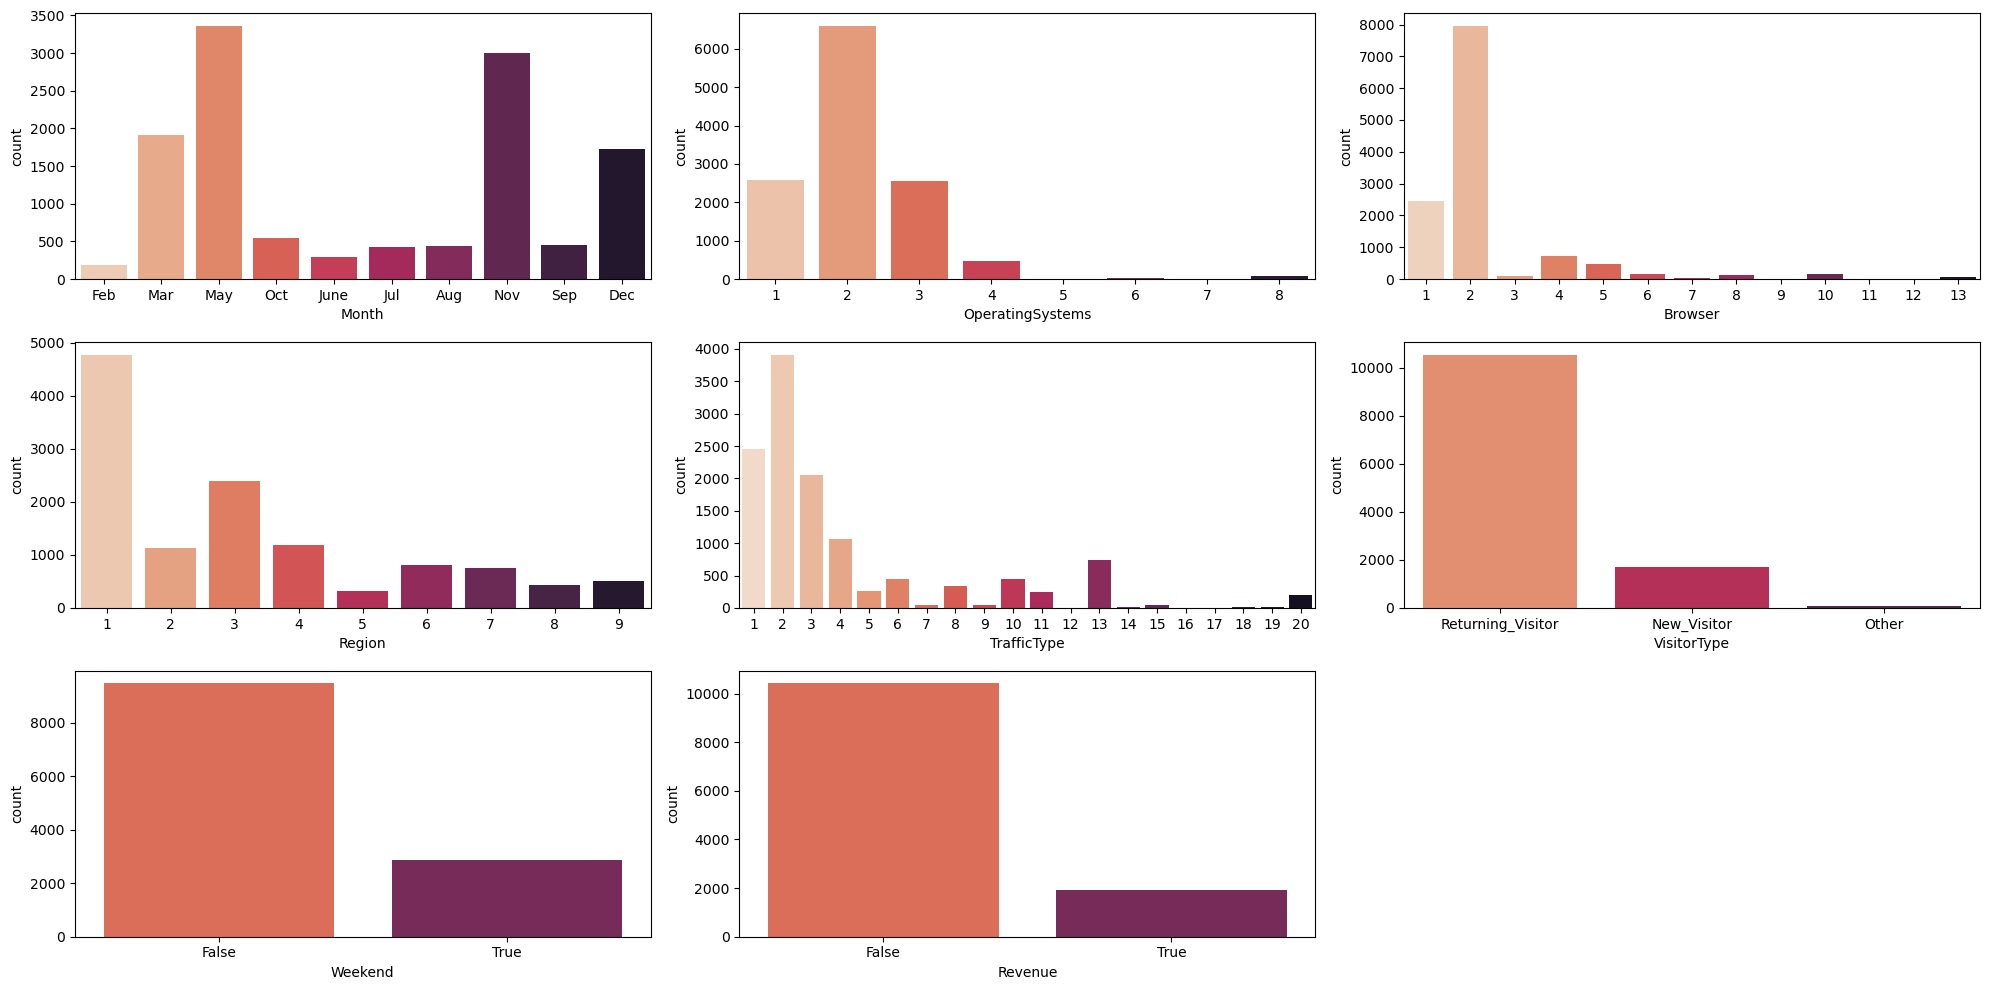

In [12]:
plt.figure(figsize = (20, 10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[cats[i]], palette = 'rocket_r', orient = 'v')
    plt.tight_layout()

1. Region yang paling banyak berkunjung di website berasal dari region 1.
2. OperatingSystems dan Browser nomor 2 yang paling sering digunakan.
3. Bulan paling banyak kunjungan terjadi pada bulan Mei.
4. TrafficType 2 yang paling umum.
5. Returning_Visitor paling banyak.
6. Weekday mendominasi dibandingkan Weekend.
7. Revenue memiliki nilai yang kecil dibandingkan yang tidak menghasilkan revenue.

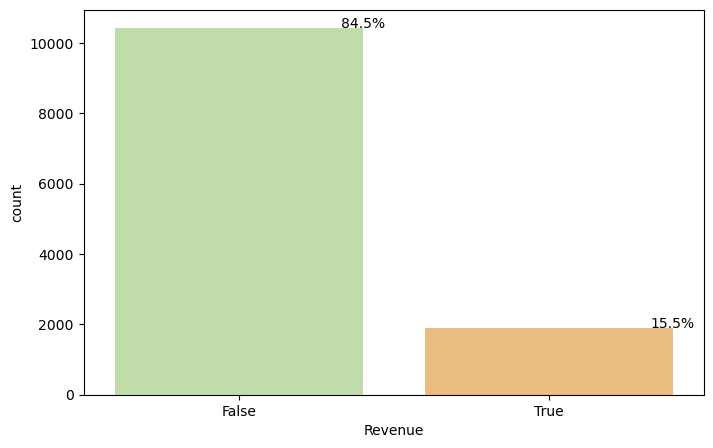

In [13]:
plt.figure(figsize = (8, 5))
total = float(len(df))
ax = sns.countplot(x = 'Revenue', data = df, palette = 'Spectral_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

In [14]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


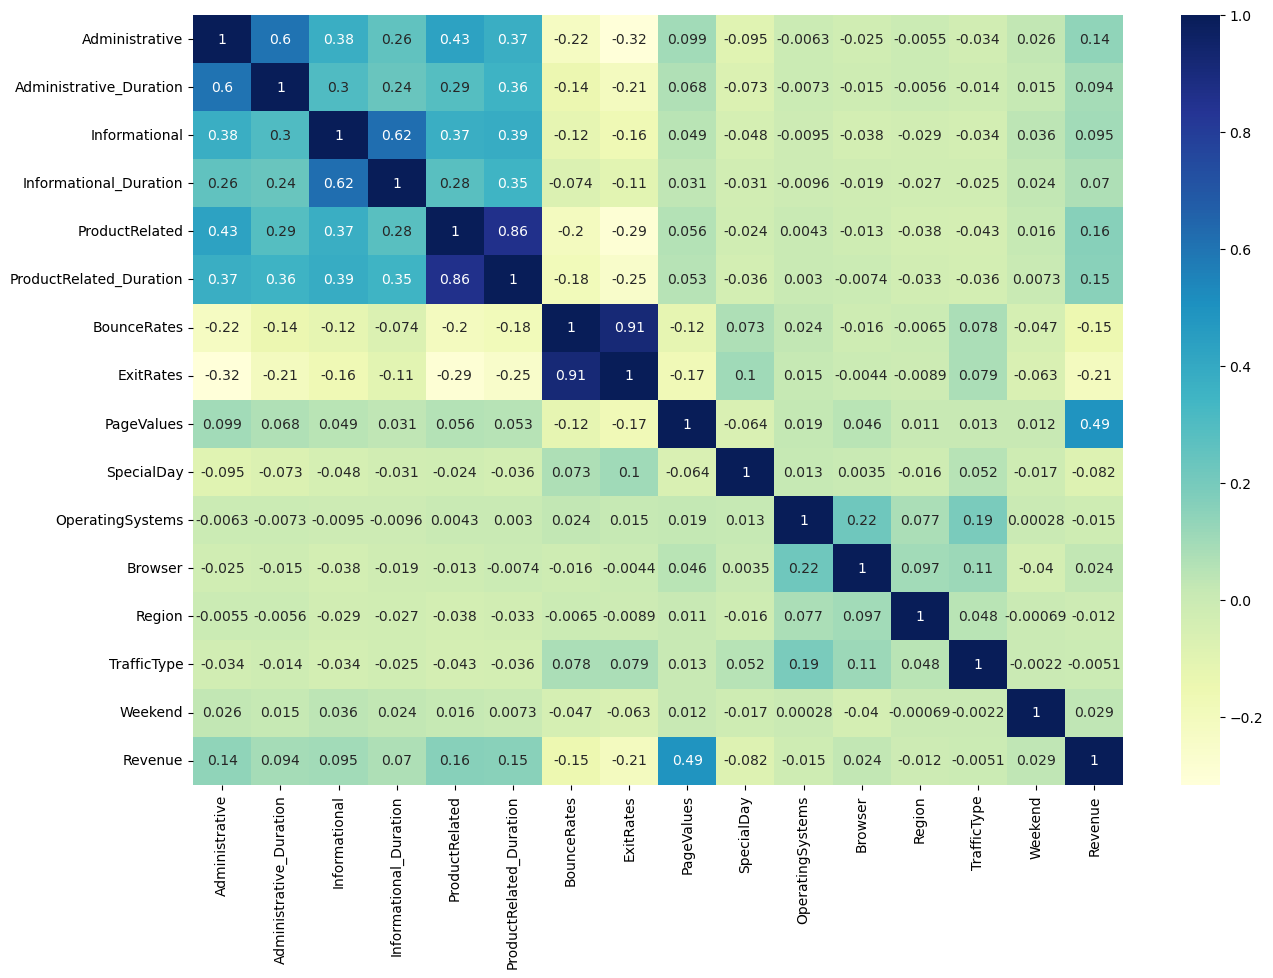

In [15]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

Korelasi berkisar dari -1 hingga +1. Nilai yang mendekati 0 berarti memiliki kecenderungan tidak ada hubungan linear antar variabel. Semakin dekat dengan +1, artinya ketika 1 variabel meningkat variabel yang lain juga meningkat. Semakin dekat dengan -1, artinya ketika 1 varibel menigkat variabel yang lain menurun. Korelasi positif yang paling besar didapat BouceRates dan ExitRates sebesar 0.91. Maknanya, semakin besar BounceRates semakin tinggi juga ExitRatesnya. Korelasi negatif paling tinggi ditunjukkan pada SpecialDay dan Revenue sebesar -0.082.
* BounceRates dan ExitRates memiliki korelasi yang lemah terhadap feature target (Revenue)
* PageValues memiliki hubungan korelasi positif yang cukup kuat terhadap Revenue
* Administrative, ProductRelated dan ProductRelated_Duration memiliki korelasi yang lemah terhadap Revenue. Sedangkan ProductRelated dan ProductRelated_Duration memiliki korelasi positif yang kuat satu sama lain.

<Figure size 2000x2000 with 0 Axes>

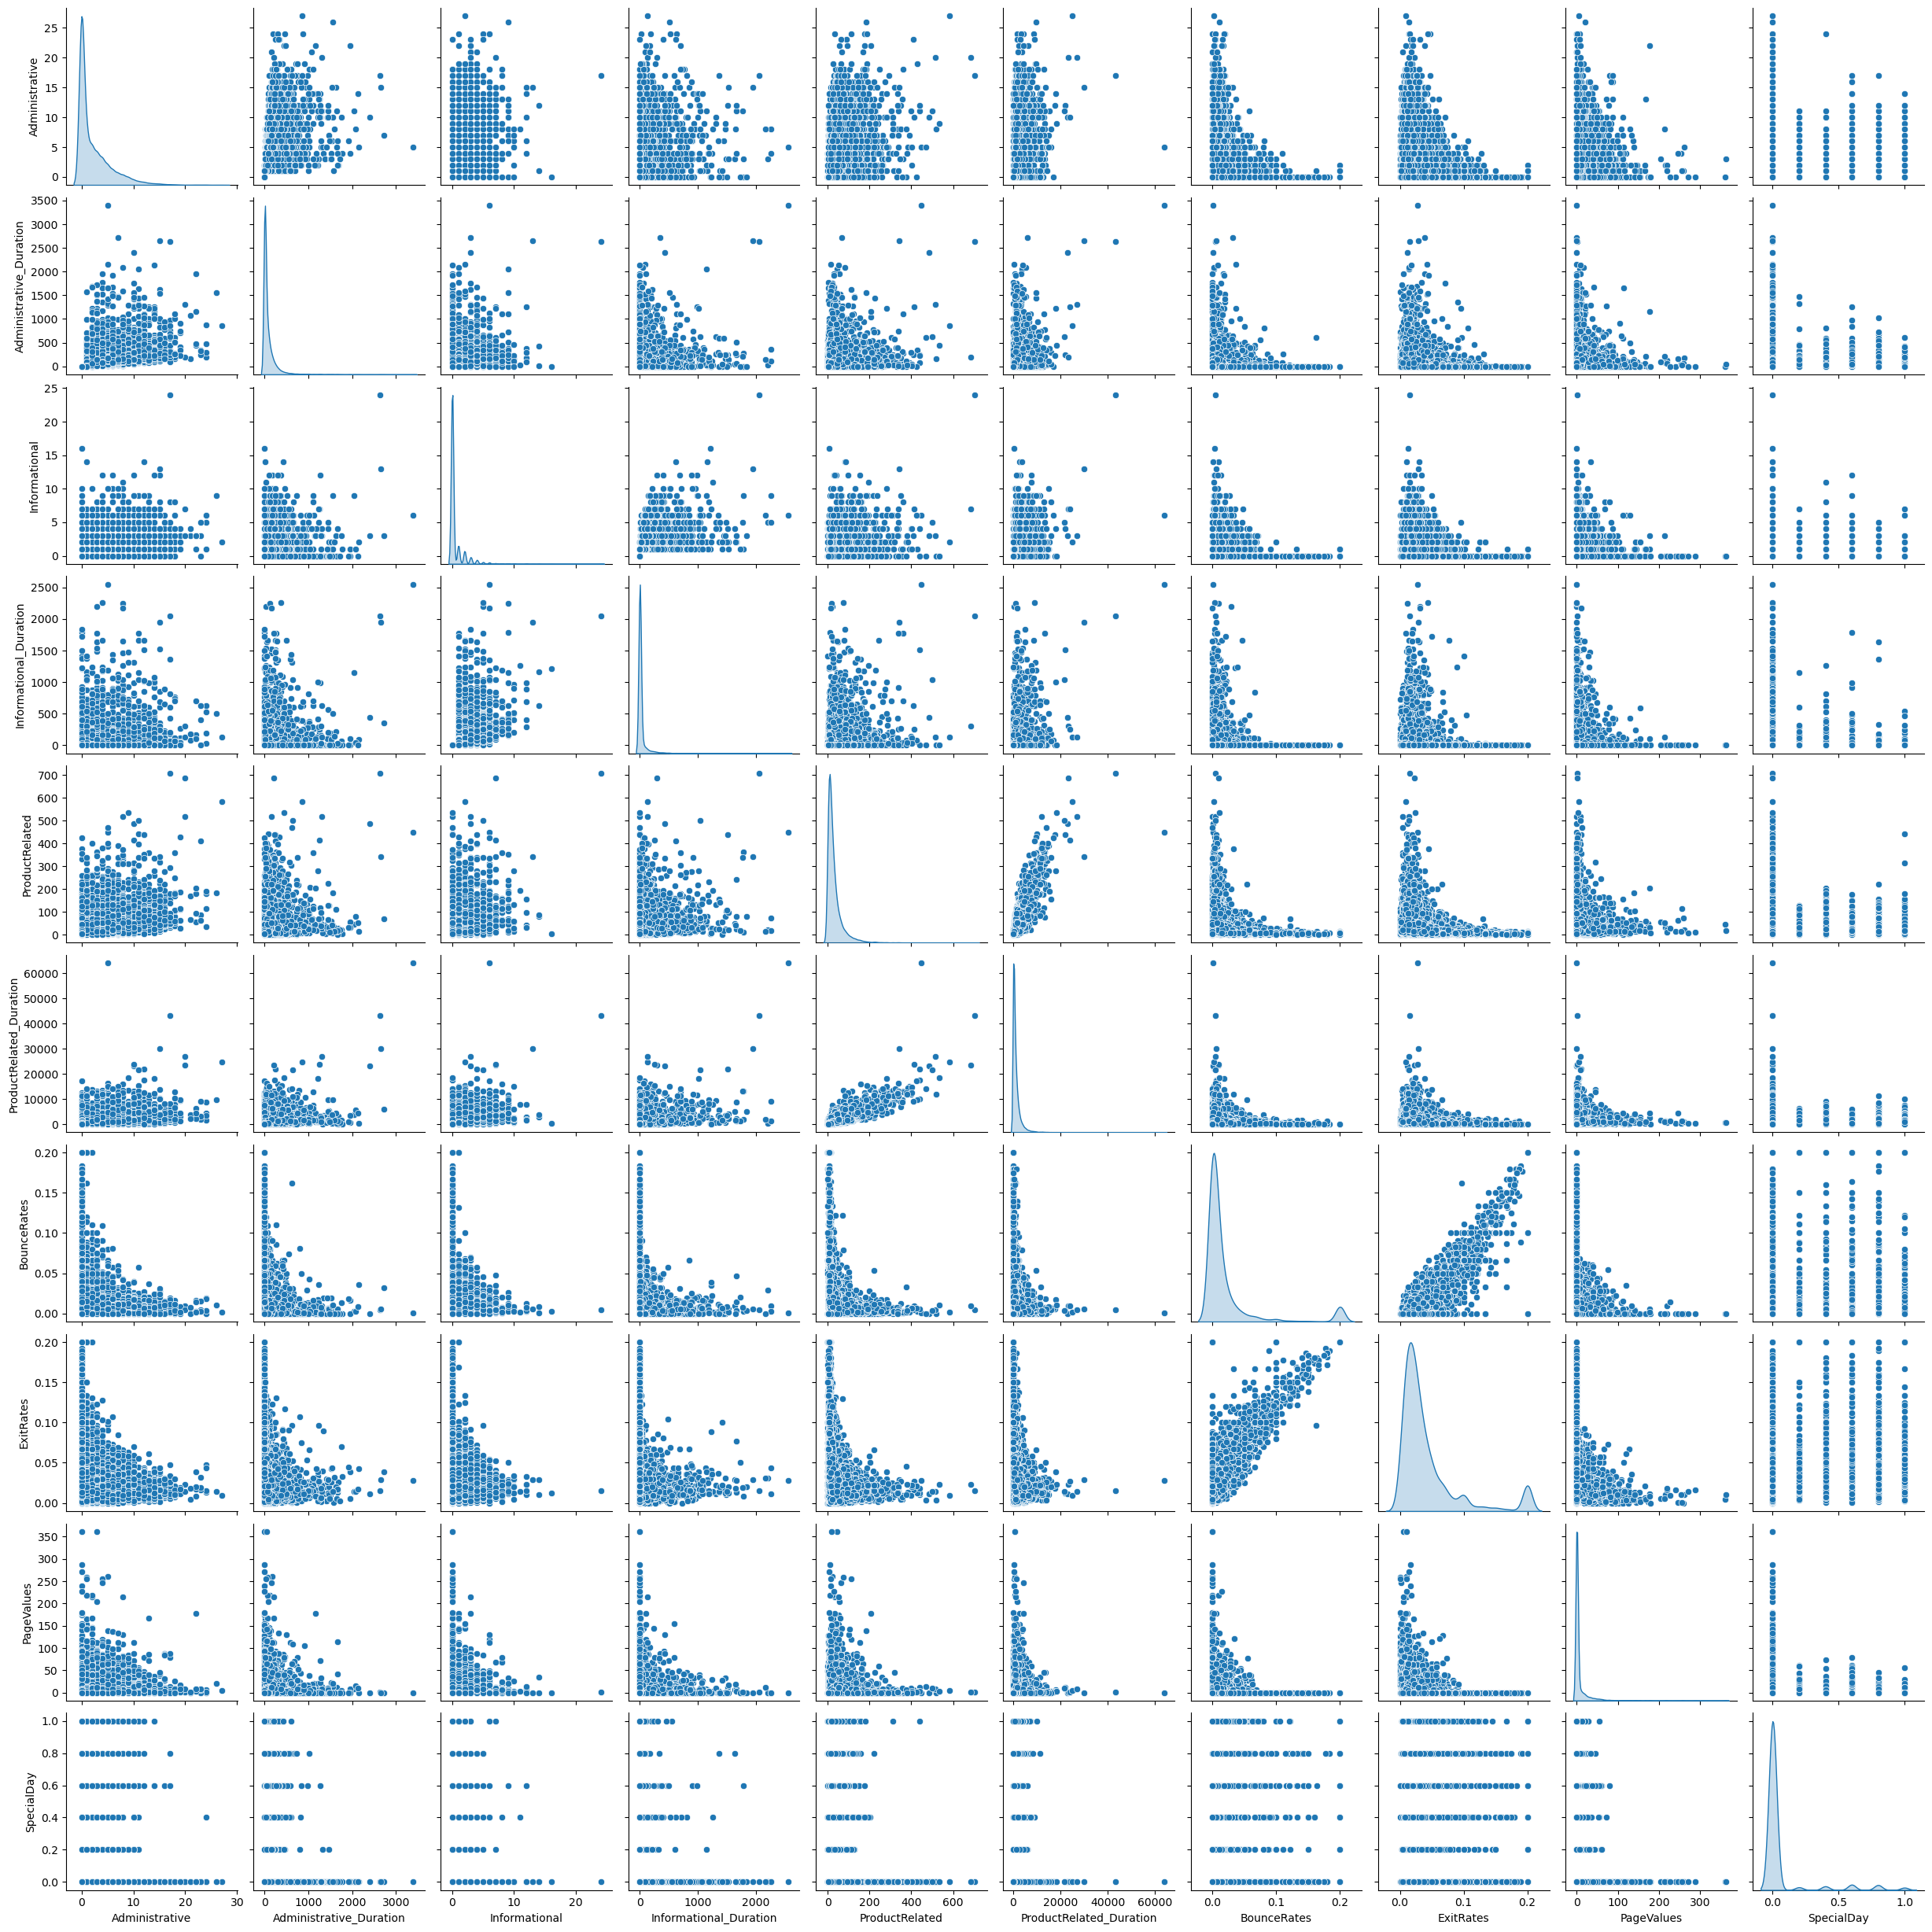

In [16]:
plt.figure(figsize = (20, 20))
sns.pairplot(df[nums], diag_kind = 'kde')

* Feature BounceRates dan ExitRates memiliki korelasi yang paling kuat diantara variabel lainnya maka menunjukkan semakin banyak BounceRates maka semakin tinggi juga nilai ExitRatesnya.
* Feature Informational dan Informational_Duration memiliki korelasi yang kuat maka menunjukkan semakin banyak user yang memasuki halaman informasi maka semakin tinggi juga nilai Informational_Durationnya.
* Korelasi yang lemah terdapat di fitur Revenue dan SpecialDay

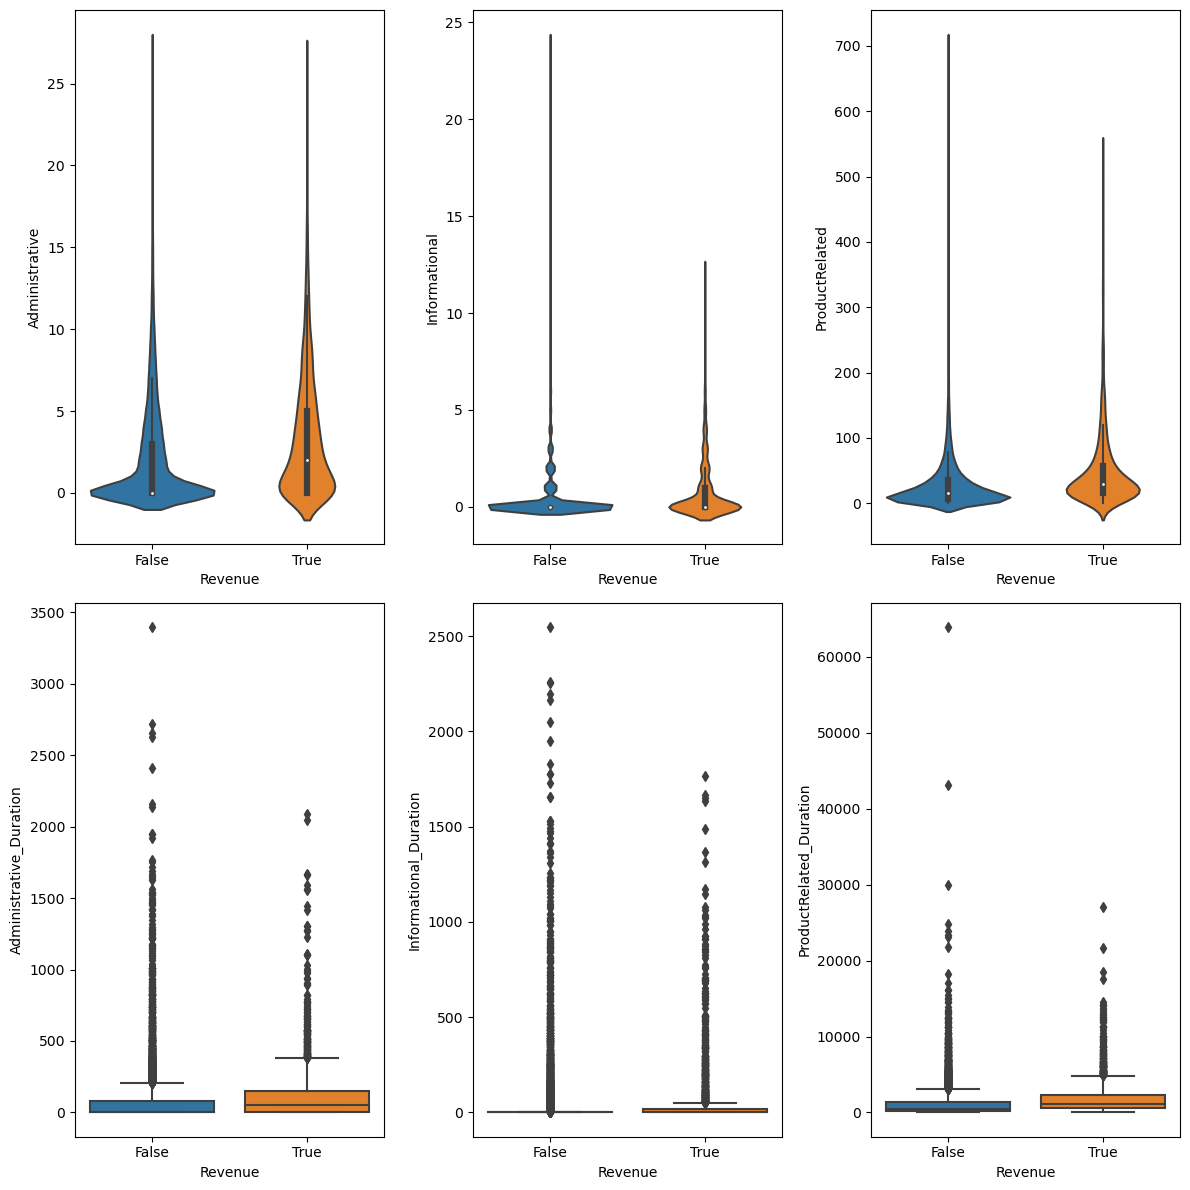

In [17]:
fig = plt.figure(figsize =  (12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=df, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=df, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=df, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.boxplot(data=df, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.boxplot(data=df, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.boxplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.show()

1. Secara umum, pengunjung cenderung mengunjungi lebih sedikit halaman, dan menghabiskan lebih sedikit waktu, jika mereka tidak akan melakukan pembelian.
2. Pengunjung wesite mengunjungi halaman web Product Related lebih banyak dibandingkan dengan halaman Administrative dan Information.
3. Pengunjung yang menghasilkan revenue cenderung lebih lama mengakses halaman web Product Related
4. 3 feature pertama memiliki distribusi normal.

**A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?**
* Berdasarkan analisis korelasi semua kolom numerik dan kategorikal memiliki korelasi ke target kecuali feature `region`. Berikut ini adalah 3 feature dari masing-masing tipe kolom yang paling tinggi nilai korelasi terhadap target.
    * Numerik: `page_values`, `exit_rates`, dan `product_related_duration`
    * Kategorikal: `month`, `traffic_type`, dan `visitor_type`

**B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?**

* Berdasarkan spearman's correlation yang ditunjukkan oleh heatmap, ada korelasi antar feature numerik yang significant di atas 0.8 yaitu kolom jumlah page dan jumlah durasi page memiliki korelasi yang tinggi yaitu 0.88 - 0.95.

* Karena terdapat korelasi tinggi antar feature numerik dan ada feature kategorikal yang tidak berkorelasi ke label maka: 
  * Salah satu dari pasangan kolom numerik yang berkorelasi tinggi harus didrop
  * Kolom region bisa didrop


## Page Metrics Analysis

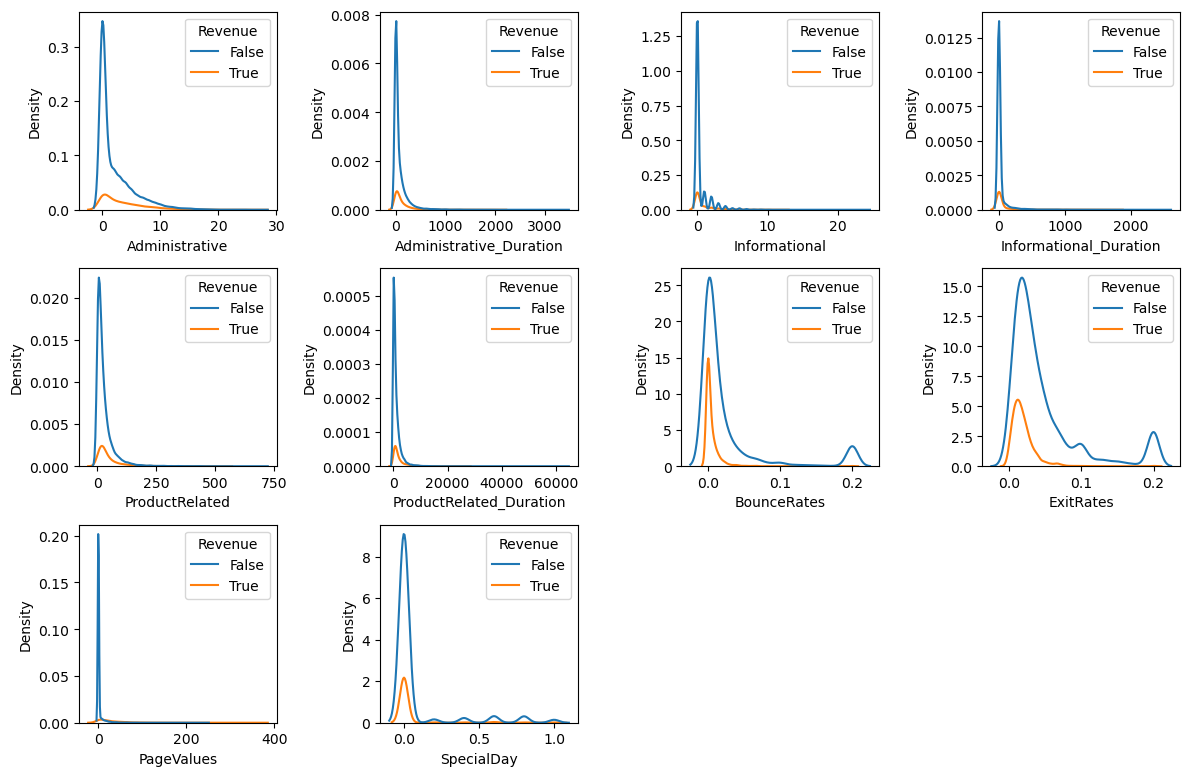

In [18]:
plt.figure(figsize = (12, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x = df[nums[i]], hue = df['Revenue'])
    plt.xlabel(nums[i])
    plt.tight_layout()

* BounceRates & PageValues tidak mengikuti distribusi normal
* Semua fitur memiliki distribusi positive skew
* Semua distribusi memiliki banyak outliers
* Rata-rata BounceRates dan ExitRate memiliki data point yang rendah
* ExitRates memiliki nilai yang lebih tinggi daripada BounceRates, dimana halaman konfirmasi transaksi misalnya akan menyebabkan rata-rata ExitRates meningkat
* Sedangkan pada BounceRates, jumlah sesi yang menghasilkan Revenue cukup  signifikan di rentang 0.00 - 0.01
* Pada kolom PageValues, di rentang 0 - 100, jumlah sesi yang menghasilkan Revenue cukup tinggi.

## Visitor Analysis

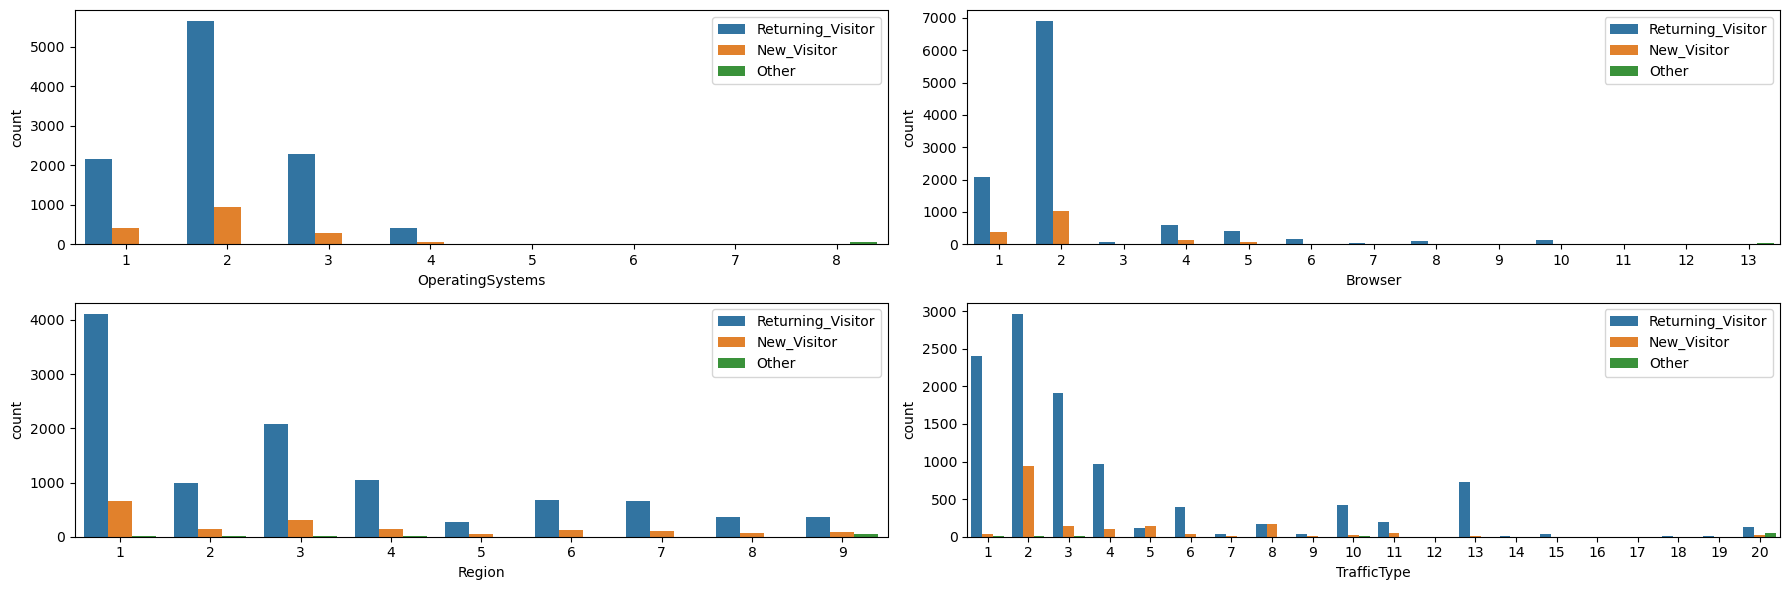

In [19]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='OperatingSystems', hue='VisitorType', ax=ax1)
sns.countplot(data=df, x='Browser', hue='VisitorType', ax=ax2)
sns.countplot(data=df, x='Region', hue='VisitorType', ax=ax3)
sns.countplot(data=df, x='TrafficType', hue='VisitorType', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')
plt.tight_layout()
plt.show()

* 1 dari sistem operasi memiliki returning visitor ~ 7000 dalam suatu kumpulan data
* 4 dari 8 sistem operasi yang digunakan, bertanggung jawab atas sejumlah kecil (<200) new visitor dalam suatu kumpulan data
* Browser yang digunakan oleh pengunjung, dimana ada 1 browser dominan, 3 dengan representasi yang layak di dataset, dan sisanya jarang diguanakan
* Selain itu, sumber TrafficType sangat beragam, dengan beberapa yan tidak berkontribusi banyak pada kumpulan data.

## Feature Categorical vs Revenue

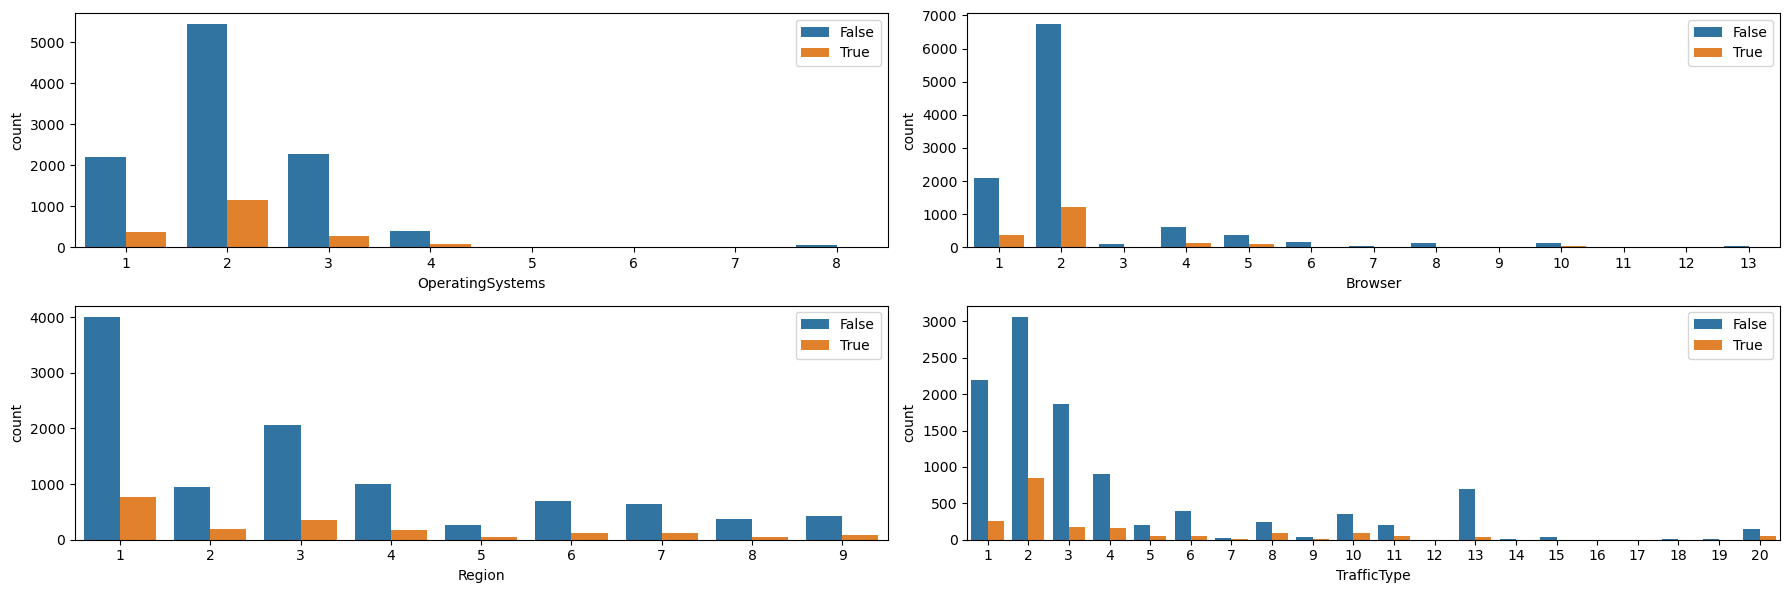

In [20]:
fig = plt.figure(figsize=(18, 6))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.countplot(data=df, x='OperatingSystems', hue='Revenue', ax=ax1)
sns.countplot(data=df, x='Browser', hue='Revenue', ax=ax2)
sns.countplot(data=df, x='Region', hue='Revenue', ax=ax3)
sns.countplot(data=df, x='TrafficType', hue='Revenue', ax=ax4)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')
ax4.legend(loc='upper right')

plt.tight_layout()
plt.show()

* Pengunjung website yang menghasilkan revenue mayoritas menggunakan browser dan OS tipe 2.
* Sumber traffic yang paling banyak menghasilkan revenue adalah traffic type 2.

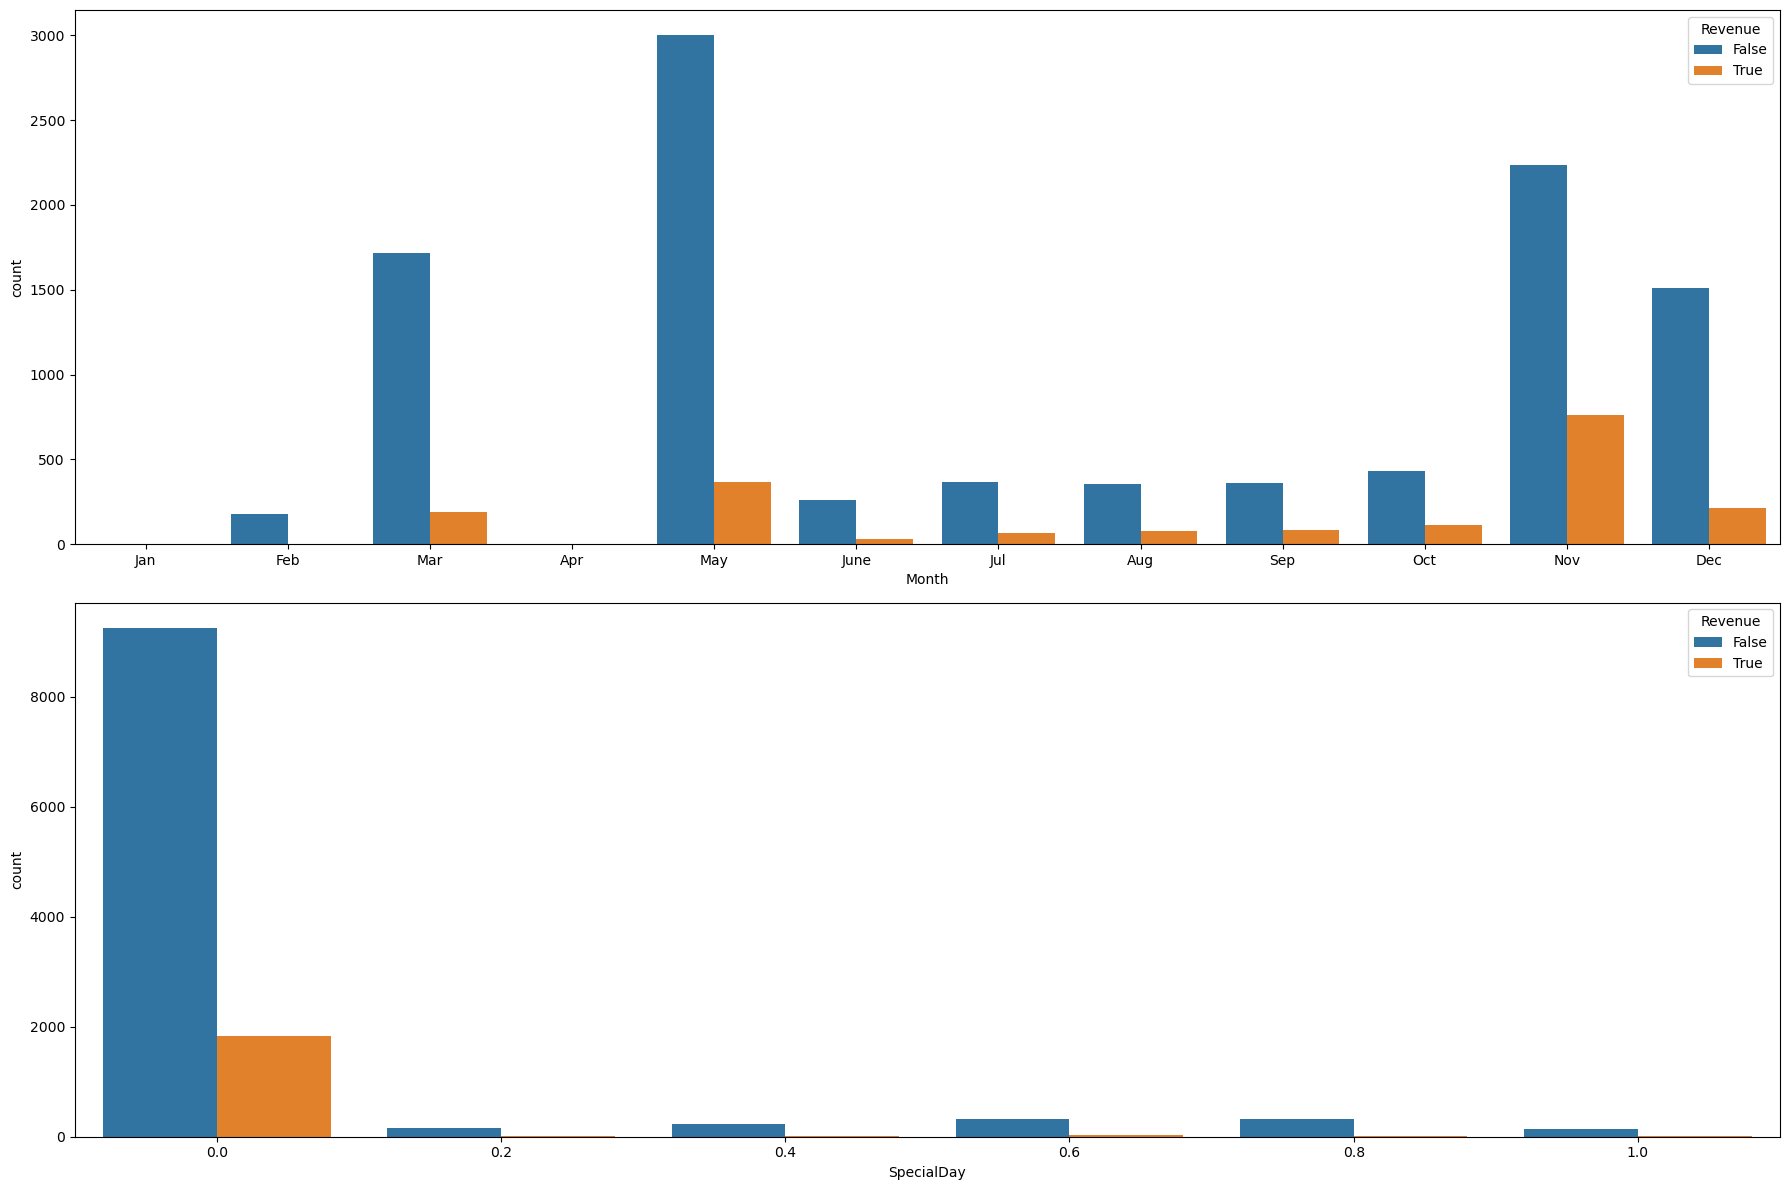

In [21]:
fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='Month', hue='Revenue', ax=ax1, order=orderlist)
sns.countplot(data=df, x='SpecialDay', hue='Revenue', ax=ax2)

plt.tight_layout()
plt.show()

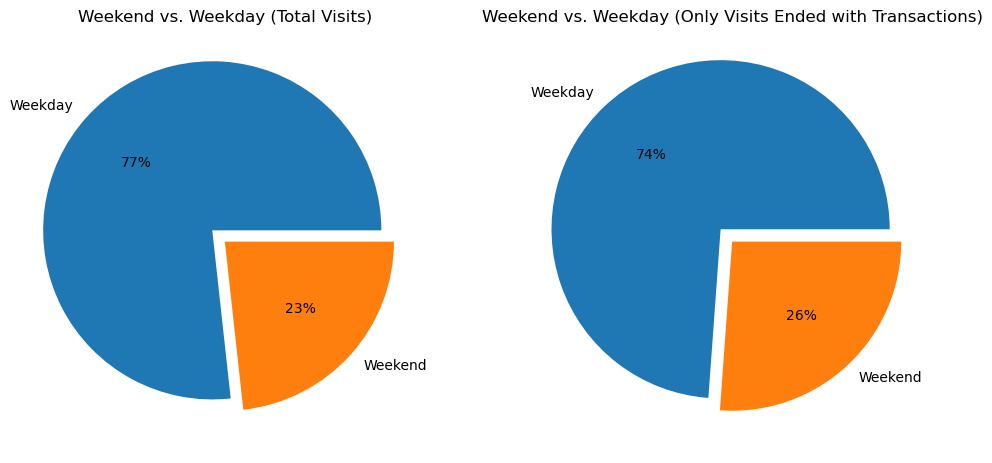

In [22]:
fig, ax = plt.subplots(1, 2,figsize=(12, 6), subplot_kw=dict(aspect="equal"))
ax[0].pie(df['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[0].set_title('Weekend vs. Weekday (Total Visits)')
ax[1].pie(df[df['Revenue'] == 1]['Weekend'].value_counts(),explode=(0.1,0),labels=['Weekday','Weekend'], autopct='%1.0f%%')
ax[1].set_title('Weekend vs. Weekday (Only Visits Ended with Transactions)')
#fig.suptitle('Weekend Visits')
plt.show()

* Pada bulan Maret dan Mei, memiliki banyak pengunjung, dimana Mei adalah bulan dengan jumlah kunjungan terbanyak, namun transaksi yang dilakukan selama 2 bulan tersebut tidak berada pada level yang sama
* Januari dan April tidak memiliki kunjungan sama sekali
* Sebagian besar transaksi terjadi selama akhir tahun, Nov sebagai bulan dengan jumlah transaksi terkonfirmasi tertinggi
* Semakin dekat tanggal kunjungan ke hari khusus (seperti hari raya, tahun baru, ... dll) semakin besar kemungkinan pengunjung melakukan transaksi
* Sebagian besar transaksi terjadi pada hari spesial (SpecialDay =0)
* Akhir pekan tidak banyak mempengaruhi jumlah kunjungan atau transaksi, hanya terlihat sedikit peningkatan jumlah transaksi yang terjadi pada akhir pekan dibandingkan dengan hari kerja

## Business Insight

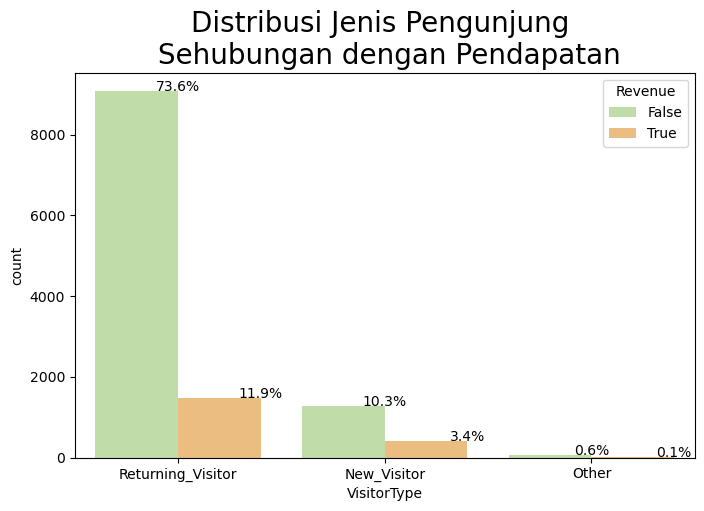

In [23]:
plt.figure(figsize = (8, 5))
total = float(len(df))
ax = sns.countplot(x = 'VisitorType', hue = 'Revenue', data = df,  palette = 'Spectral_r')
plt.title('Distribusi Jenis Pengunjung \n Sehubungan dengan Pendapatan', fontsize = 20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

Pengunjung didominasi pengunjung lama 'ReturningVisitor', namun angka konversi pengunjung baru 'NewVisitor' masih lebih bagus dibandingkan dengan konversi pengunjung lama. Oleh karena itu di page 'ProductRelated' harus ada call to actionnya supaya mempersingkat nilai 'ProductRelated_Duration' sehingga meningkatkan conversion rate.

Rekomendasi: Ada baiknya kita memberikan treatment khusus pada pengunjung lama 'ReturningVisitor', seperti melacak history produk yang dilihat dan memberikan promo terkait produk yang sering dilihat. Sedangkan untuk 'New Visitor', perusahaan dapat berlangganan iklan pada scoial media supaya pengguna yang belum pernah berkunjung akan tertarikuntuk mengunjungi website ecommerce.

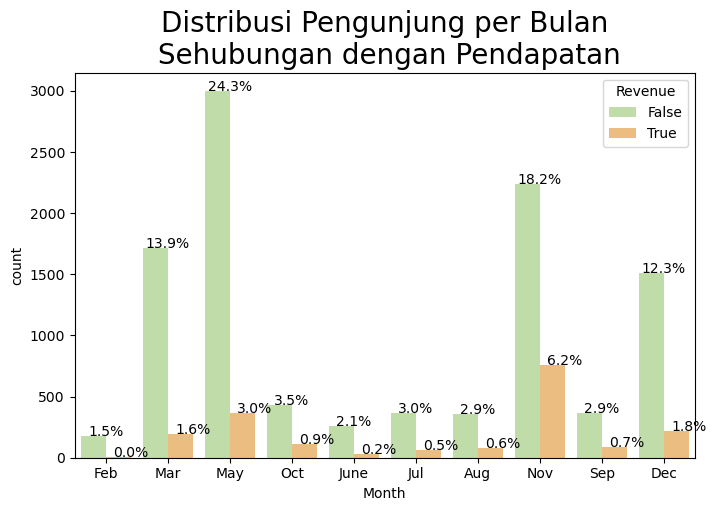

In [24]:
plt.figure(figsize = (8, 5))
total = float(len(df))
ax = sns.countplot(x = 'Month', hue = 'Revenue', data = df, palette = 'Spectral_r')
plt.title('Distribusi Pengunjung per Bulan\n Sehubungan dengan Pendapatan', fontsize = 20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

Pembelian tertinggi pada bulan November. Hal ini terjadi karena adanya black Friday pada bulan November sehingga pengunjung cenderung melakukan pembelian besar-besaran. Perusahaan bisa memanfaatkan momentum ini untuk memberikan promo lebih banyak di bulan November agar pendapatan dapat ditingkatkan lagi. Pada bulan Februari, Revenue ada pada 0%. Perlu adanya promo lebih seperti gratis ongkir dan cashback di hari valentine.

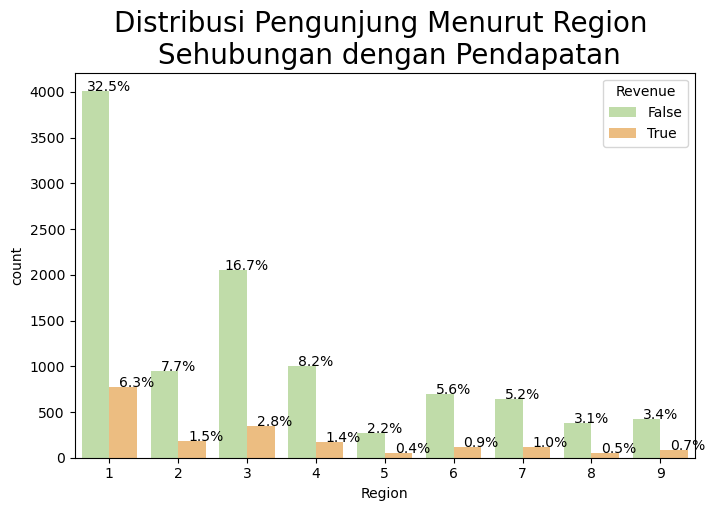

In [25]:
plt.figure(figsize = (8, 5))
total = float(len(df))
ax = sns.countplot(x = 'Region', hue = 'Revenue', data = df, palette = 'Spectral_r')
plt.title('Distribusi Pengunjung Menurut Region \n Sehubungan dengan Pendapatan', fontsize = 20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

Region yang menghasilkan revenue tertinggi berada di region 1. Dari 9 region yang ada, pengunjung dari 3 region masih memiliki tingkat revenue yang sangat rendah, yaitu region 5, 8, dan 9. Perlu diberikan promo besar-besaran untuk pengunjung yang berada di region 5, 8, dan 9.

## Processing

### Missing Values

In [26]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Tidak terdapat missing values.

### Duplicated Data

In [27]:
print(f'Jumlah row duplicated sebelum dihapus: {df.duplicated().sum()}')

# drop duplicated rows
df.drop_duplicates(inplace=True)   # keep = 'First'
print(f'Jumlah row duplicated SETELAH dihapus: {df.duplicated().sum()}')

Jumlah row duplicated sebelum dihapus: 125
Jumlah row duplicated SETELAH dihapus: 0


### Handling Outliers

In [28]:
# IQR Function
def IQR(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    
    bb = q1 - 1.5*(q3 - q1)
    ba = q3 + 1.5*(q3 - q1)
    
    outlier_indices = list(x.index[ (x < bb) | (x > ba)])
    outlier_values = list(x[outlier_indices])
    
    return len(outlier_indices)

#IQR Method
for i in nums:
    print(f'Jumlah outlier IQR {i}: {IQR(df[i])}')

Jumlah outlier IQR Administrative: 404
Jumlah outlier IQR Administrative_Duration: 1149
Jumlah outlier IQR Informational: 2631
Jumlah outlier IQR Informational_Duration: 2405
Jumlah outlier IQR ProductRelated: 1007
Jumlah outlier IQR ProductRelated_Duration: 951
Jumlah outlier IQR BounceRates: 1428
Jumlah outlier IQR ExitRates: 1325
Jumlah outlier IQR PageValues: 2730
Jumlah outlier IQR SpecialDay: 1249


Seluruh feature numerical memiliki outlier dnegan jumlah yang cukup besar, dimana 3 feature terbesar yaitu: PageValues(2730), Informational (2631), dan Informational_Duration (2405).

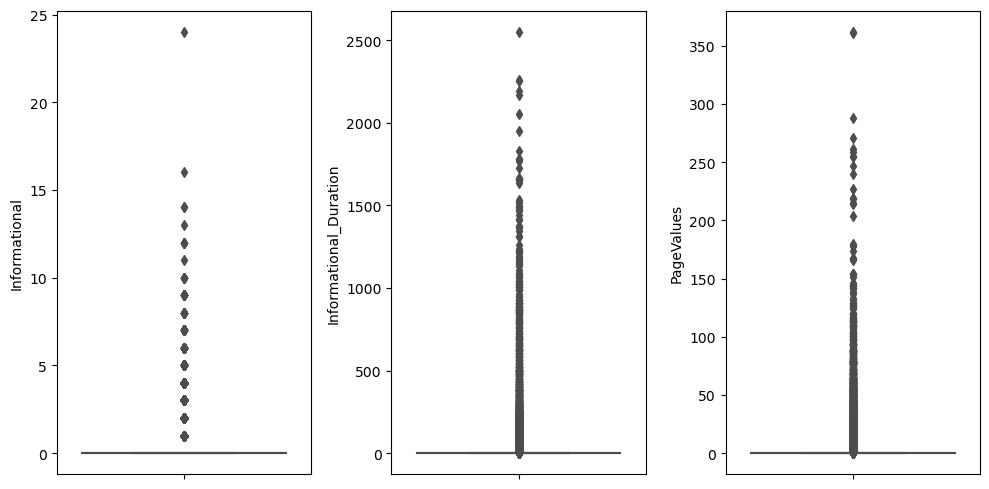

In [29]:
# Cek Boxplot
ot = ['Informational', 'Informational_Duration', 'PageValues']
plt.figure(figsize=(10,5))
for i in range(0, len(ot)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[ot[i]], color='gray', orient='v')
    plt.tight_layout()

Tidak terlihat distribusi dari masing-masing feature.

In [30]:
from scipy import stats

z_score = df.copy()

print(f'Jumlah baris sebelum memfilter outlier: {len(z_score)}')

filtered_entries = np.array([True] * len(z_score)) 
for col in nums:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries

z_score = z_score[filtered_entries]

print(f'Jumlah baris setelah memfilter outlires: {len(z_score)}')
print(f'Persentase drop data outliers: {round(((len(df)-len(z_score))/len(df))*100, 2)}%')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlires: 10020
Persentase drop data outliers: 17.9%


* Persentase outliers yang didrop (17.9% > 5%) sangat besar.
* Tidak dilakukan drop outliers, sehingga jumlah row tetap 12205.
* Hal tersebut juga didukung oleh informasi pada dataset yang diperoleh melalui google analytics. Pada nilai maksimumnya, nilai tersebut masih memiliki makna. Sebagai contoh pada Informational_Duration mungkin terjadi saat user/pengunjung membuka lalu membiarkan halaman tersebut tetap terbuka pada devicenya. Namun tentu, tidak dapat diketahui pasti status dari outlier yang terdapat pada data.
* Adanya outliers pada data perlu menjadi catatan saat pemodelan. 

### Feature Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#label encoding for Revenue and Weekend
df['Revenue'] = LabelEncoder().fit_transform(df['Revenue'])
df['Weekend'] = LabelEncoder().fit_transform(df['Weekend'])

In [32]:
#Label Encoding for Month

#Berdasarkan urutan bulan
mapping_month = {'Jan' : 1, 'Feb' : 2, 'Mar' : 3, 'Apr' : 4,
                'May' : 5, 'June' : 6, 'Jul' : 7, 'Aug' :8,
                'Sep' : 9, 'Oct' : 10, 'Nov' : 11, 'Dec' : 12}

df['Month'] = df['Month'].map(mapping_month)

### One Hot Encoding

In [33]:
onehot = pd.get_dummies(df['VisitorType'], prefix = 'VT')
df = df.join(onehot)

df = df.drop(['VisitorType'], axis = 1)

In [34]:
df_pr = df.copy()

In [35]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  int64  
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

### Feature Engineering

Text(0.5, 1.0, 'Data Correlation')

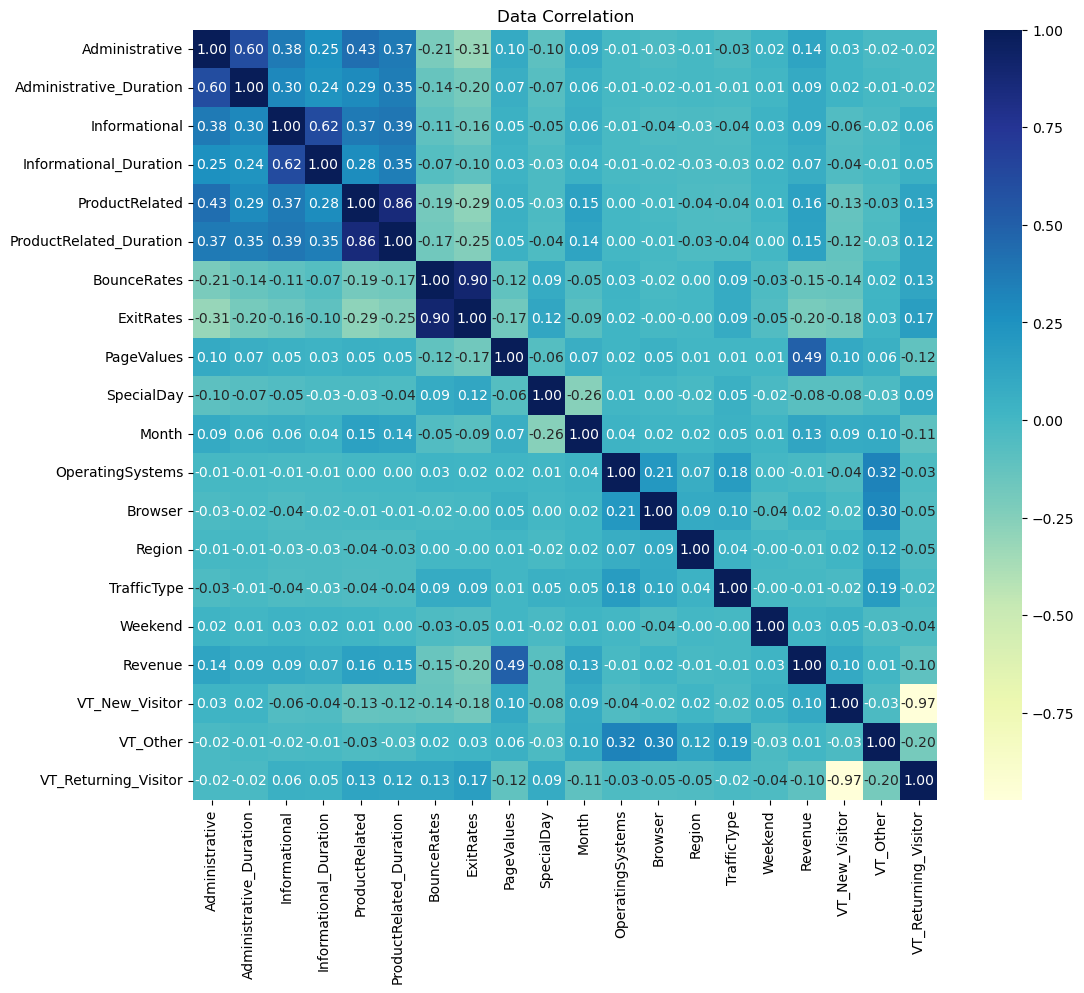

In [36]:
# Numericals Correlation
plt.figure(figsize = (12, 10))
sns.heatmap(df_pr.corr(), cmap = 'YlGnBu', annot = True, fmt = '.2f')
plt.title('Data Correlation')

### Feature Selection

Pengunjung yang tidak memberikan keterangan pengunjung kembali atau pengunjung baru didrop karena tidak relevan.

In [37]:
df_ftr = df_pr[df_pr.VT_Other != 1].copy()
df_ftr.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VT_New_Visitor,VT_Other,VT_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,0,0,0,1


In [38]:
df2 = df_ftr.drop(['OperatingSystems', 'Browser', 'TrafficType', 'BounceRates', 'VT_Other', 'VT_Returning_Visitor'], axis = 1)
df2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,Region,Weekend,Revenue,VT_New_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.10,0.0,0.0,2,1,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,9,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.14,0.0,0.0,2,2,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.05,0.0,0.0,2,1,1,0,0


### Feature Transformation

In [39]:
df2['ATP_Administrative'] = df2['Administrative_Duration']/df2['Administrative']
df2['ATP_Informational'] = df2['Informational_Duration']/df2['Informational']
df2['ATP_ProductRelated'] = df2['ProductRelated_Duration']/df2['ProductRelated']

In [40]:
df2.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,Region,Weekend,Revenue,VT_New_Visitor,ATP_Administrative,ATP_Informational,ATP_ProductRelated
5726,0,0.000000,0,0.0,3,50.200000,0.066667,0.000000,0.0,9,1,0,0,0,NaN,NaN,16.733333
5752,1,26.200000,0,0.0,32,1427.676667,0.021875,19.965636,0.0,9,3,0,1,0,26.200000,NaN,44.614896
4048,0,0.000000,0,0.0,29,1137.166667,0.007143,22.274571,0.0,5,1,1,1,0,NaN,NaN,39.212644
9144,0,0.000000,0,0.0,6,269.250000,0.008333,0.000000,0.0,11,1,0,0,1,NaN,NaN,44.875000
7937,2,59.400000,0,0.0,86,3334.506667,0.050388,0.000000,0.0,8,7,0,0,0,29.700000,NaN,38.773333
12177,0,0.000000,0,0.0,4,86.000000,0.025000,0.000000,0.0,12,1,1,0,1,NaN,NaN,21.500000
10443,0,0.000000,0,0.0,8,83.500000,0.100000,0.000000,0.0,12,5,0,0,0,NaN,NaN,10.437500
8149,0,0.000000,0,0.0,6,291.000000,0.033333,0.000000,0.0,11,7,0,0,0,NaN,NaN,48.500000
6782,1,146.000000,0,0.0,7,221.400000,0.022500,0.000000,0.0,11,4,0,0,0,146.000000,NaN,31.628571
9419,7,87.916667,1,0.0,46,1621.025379,0.020544,6.023523,0.0,12,3,0,0,0,12.559524,0.0,35.239682


In [41]:
df3 = df2.drop(['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'], axis = 1)

In [42]:
df3['ATP_Administrative'] = df3['ATP_Administrative'].fillna(0)
df3['ATP_Informational'] = df3['ATP_Informational'].fillna(0)
df3['ATP_ProductRelated'] = df3['ATP_ProductRelated'].fillna(0)

In [43]:
df3.head()

,ExitRates,PageValues,SpecialDay,Month,Region,Weekend,Revenue,VT_New_Visitor,ATP_Administrative,ATP_Informational,ATP_ProductRelated
0,0.20,0.0,0.0,2,1,0,0,0,0.0,0.0,0.000000
1,0.10,0.0,0.0,2,1,0,0,0,0.0,0.0,32.000000
2,0.20,0.0,0.0,2,9,0,0,0,0.0,0.0,0.000000
3,0.14,0.0,0.0,2,2,0,0,0,0.0,0.0,1.333333
4,0.05,0.0,0.0,2,1,1,0,0,0.0,0.0,62.750000


In [44]:
df = df3.copy()

# Machine Learning Modelling

### Splitting Data

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12124 entries, 0 to 12329
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ExitRates           12124 non-null  float64
 1   PageValues          12124 non-null  float64
 2   SpecialDay          12124 non-null  float64
 3   Month               12124 non-null  int64  
 4   Region              12124 non-null  int64  
 5   Weekend             12124 non-null  int64  
 6   Revenue             12124 non-null  int64  
 7   VT_New_Visitor      12124 non-null  uint8  
 8   ATP_Administrative  12124 non-null  float64
 9   ATP_Informational   12124 non-null  float64
 10  ATP_ProductRelated  12124 non-null  float64
dtypes: float64(6), int64(4), uint8(1)
memory usage: 1.0 MB


In [46]:
X = df.drop(['Revenue'], axis = 1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

In [47]:
print(X_train.info())
print(X_test.info())
print(y_train.info())
print(y_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8486 entries, 493 to 4618
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ExitRates           8486 non-null   float64
 1   PageValues          8486 non-null   float64
 2   SpecialDay          8486 non-null   float64
 3   Month               8486 non-null   int64  
 4   Region              8486 non-null   int64  
 5   Weekend             8486 non-null   int64  
 6   VT_New_Visitor      8486 non-null   uint8  
 7   ATP_Administrative  8486 non-null   float64
 8   ATP_Informational   8486 non-null   float64
 9   ATP_ProductRelated  8486 non-null   float64
dtypes: float64(6), int64(3), uint8(1)
memory usage: 671.3 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3638 entries, 4010 to 9511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ExitRates           363

### Standard Scaler

In [48]:
scaler = StandardScaler()
# Data Train
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns = list(X.columns))

# Data Test
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = list(X.columns))

In [49]:
y_train.value_counts(normalize = True)

0    0.843625
1    0.156375
Name: Revenue, dtype: float64

Feature Target (Revenue) memiliki data yang tidak seimbang (imbalance).

### Handling Imbalance Data

In [50]:
X_smote, y_smote = over_sampling.SMOTE(sampling_strategy = 0.5).fit_resample(X_train, y_train)
print('After SMOTE Oversampling')
print(pd.Series(y_smote).value_counts())

After SMOTE Oversampling
0    7159
1    3579
Name: Revenue, dtype: int64


## Model & Evaluation

Creating functions for model evaulation

In [51]:
def eval_classification(model):
    global y_pred
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    #print (y_test.shape)
    #print(y_pred_proba_train.shape)
    
    print("Accuracy Score(Train set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision Score (Train set):%.2f" % precision_score(y_train, y_pred_train))
    print("Recall Score (Train set):%.2f" % recall_score(y_train, y_pred_train))
    print("F1 Score (Train set):%.2f" % f1_score(y_train, y_pred_train))
    print("")

    print("Accuracy Score(Test set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision Score (Test set):%.2f" % precision_score(y_test, y_pred))
    print("Recall Score (Test set):%.2f" % recall_score(y_test, y_pred))
    print("F1 Score (Test set):%.2f" % f1_score(y_test, y_pred))
    print("")

    print("ROC AUC Score (Train-proba): %.2f" % roc_auc_score (y_train, y_pred_proba_train[:,1]))
    print("ROC AUC Score (Test-proba): %.2f" % roc_auc_score (y_test, y_pred_proba[:,1]))
    
    #score = cross_validate(model, X, y, cv = 5, scoring = 'roc_auc', return_train_score = True)
    #print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    #print('roc_auc (crossval test): '+ str(score['test_score'].mean()))
    
# feature importance
def show_feature_importance(model):   
    feat_importances = pd.Series(model.feature_importances_,index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh',figsize=(28, 5))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title(f'{model}')

# hyperparameter
def show_best_hyperparameter(model):   
    print(model.best_estimator_.get_params())

In [52]:
# Learning Curves
def draw_learning_curves(param_values):
    train_scores = []
    test_scores = []
    
    for c in param_values:
        model = LogisticRegression(penalty = '12', C=c)
        model.fit(X_train, y_train)
        
        # Eval on Train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)
        
        # Eval on Test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        test_scores.append(test_auc)
        
        print('param value:' + str(c) + ';train' + str(train_auc) + ';test:' + str(test_auc))
        
    plt.plot(param_values, train_scores, label = 'Train')
    plt.plot(param_values, train_scores, label = 'Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

### Logistic Regression

In [53]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
eval_classification(logreg)

Accuracy Score(Train set): 0.88
Precision Score (Train set):0.76
Recall Score (Train set):0.37
F1 Score (Train set):0.50

Accuracy Score(Test set): 0.88
Precision Score (Test set):0.74
Recall Score (Test set):0.35
F1 Score (Test set):0.47

ROC AUC Score (Train-proba): 0.88
ROC AUC Score (Test-proba): 0.88


In [54]:
# Using data train oversampling with smote(0.5)
logreg = LogisticRegression()
logreg.fit(X_smote, y_smote)
eval_classification(logreg)

Accuracy Score(Train set): 0.89
Precision Score (Train set):0.68
Recall Score (Train set):0.57
F1 Score (Train set):0.62

Accuracy Score(Test set): 0.89
Precision Score (Test set):0.67
Recall Score (Test set):0.58
F1 Score (Test set):0.62

ROC AUC Score (Train-proba): 0.89
ROC AUC Score (Test-proba): 0.88


In [55]:
value1 = logreg.coef_

In [56]:
# Tuning Hyperparameter
penalty = ['l1', 'l2']
C = [0.01]
hyperparameters = dict(penalty = penalty, C = C)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring = 'roc_auc', random_state = 8, cv = 5)
rs.fit(X_smote, y_smote)
eval_classification(rs)

Accuracy Score(Train set): 0.89
Precision Score (Train set):0.69
Recall Score (Train set):0.55
F1 Score (Train set):0.61

Accuracy Score(Test set): 0.89
Precision Score (Test set):0.67
Recall Score (Test set):0.53
F1 Score (Test set):0.59

ROC AUC Score (Train-proba): 0.89
ROC AUC Score (Test-proba): 0.88


In [57]:
value2 = rs.best_estimator_.coef_

In [58]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

param value: 0.0001; train: 0.870471641400157; test: 0.8713292190906238
param value: 0.0003020408163265306; train: 0.8734385909547511; test: 0.8739313864114799
param value: 0.0005040816326530613; train: 0.8756268030934338; test: 0.8758493185005573
param value: 0.000706122448979592; train: 0.8772476463930027; test: 0.8772632894551173
param value: 0.0009081632653061226; train: 0.878464699921358; test: 0.8783691241731437
param value: 0.0011102040816326532; train: 0.879450069068472; test: 0.879159335232067
param value: 0.001312244897959184; train: 0.880206069625525; test: 0.8797750317495514
param value: 0.0015142857142857145; train: 0.8808331227191432; test: 0.8803221895527417
param value: 0.0017163265306122451; train: 0.8813457546758194; test: 0.8807322699273431
param value: 0.0019183673469387757; train: 0.8817722813058915; test: 0.8810703558541566
param value: 0.002120408163265306; train: 0.8821354394682185; test: 0.8813692768013731
param value: 0.002322448979591837; train: 0.88245312391

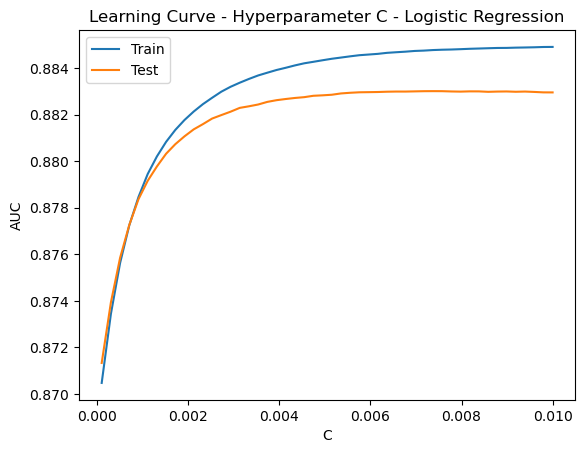

In [59]:
# Best C Hyperparameter
param_values = [float(x) for x in np.linspace(0.0001, 0.01, 50)]
draw_learning_curve(param_values)

In [60]:
#best hyperparameter
show_best_hyperparameter(rs)

{'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [61]:
#Model coefficient, value 1 = normal model, value 2 =tuned model
names = X.columns
table = {'names': names, 'value1': value1, 'value2': value2}
table

{'names': Index(['ExitRates', 'PageValues', 'SpecialDay', 'Month', 'Region', 'Weekend',
        'VT_New_Visitor', 'ATP_Administrative', 'ATP_Informational',
        'ATP_ProductRelated'],
       dtype='object'),
 'value1': array([[-0.96985628,  1.79736105, -0.11519117,  0.38314742, -0.12125465,
          0.05376943, -0.00567203,  0.00694353,  0.08785706,  0.01869493]]),
 'value2': array([[-0.76370256,  1.50150898, -0.11492705,  0.3332503 , -0.10693024,
          0.05013013,  0.01615495,  0.02059066,  0.09291834,  0.02018422]])}

### K-Nearest Neighbor (KNN)

In [62]:
knn = KNeighborsClassifier(n_neighbors = 99)
knn.fit(X_train, y_train)
eval_classification(knn)

Accuracy Score(Train set): 0.88
Precision Score (Train set):0.76
Recall Score (Train set):0.34
F1 Score (Train set):0.47

Accuracy Score(Test set): 0.88
Precision Score (Test set):0.73
Recall Score (Test set):0.32
F1 Score (Test set):0.45

ROC AUC Score (Train-proba): 0.88
ROC AUC Score (Test-proba): 0.87


In [63]:
# Using data train oversampling with smote(0.5)
knn = KNeighborsClassifier(n_neighbors = 99)
knn.fit(X_smote, y_smote)
eval_classification(knn)

Accuracy Score(Train set): 0.88
Precision Score (Train set):0.63
Recall Score (Train set):0.58
F1 Score (Train set):0.60

Accuracy Score(Test set): 0.88
Precision Score (Test set):0.61
Recall Score (Test set):0.53
F1 Score (Test set):0.57

ROC AUC Score (Train-proba): 0.89
ROC AUC Score (Test-proba): 0.87


In [64]:
# Hyperparameter Tuning
n_neighbors = [99]
p = [1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors = n_neighbors, p = p, algorithm = algorithm)

knn = KNeighborsClassifier()
rs = RandomizedSearchCV(knn, hyperparameters, scoring = 'roc_auc', random_state = 8, cv = 5)
rs.fit(X_smote, y_smote)
eval_classification(rs)

Accuracy Score(Train set): 0.89
Precision Score (Train set):0.66
Recall Score (Train set):0.59
F1 Score (Train set):0.62

Accuracy Score(Test set): 0.89
Precision Score (Test set):0.65
Recall Score (Test set):0.56
F1 Score (Test set):0.60

ROC AUC Score (Train-proba): 0.90
ROC AUC Score (Test-proba): 0.88


In [65]:
print('Best n_neighbors:', rs.best_estimator_.get_params()['n_neighbors'])
print('Best p:', rs.best_estimator_.get_params()['p'])
print('Best algorithm', rs.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 99
Best p: 1
Best algorithm auto


param value: 1; train:0.9992464204973625; test:0.7143332306212544
param value: 2; train:0.976446035276026; test:0.7620620937713284
param value: 3; train:0.963132604413498; test:0.7857102540252097
param value: 4; train:0.9546583350114047; test:0.8047069969963916
param value: 5; train:0.9479228037325922; test:0.8180084031919458
param value: 6; train:0.943054063302994; test:0.8268139001120234
param value: 7; train:0.9386693758616453; test:0.8336743950306553
param value: 8; train:0.9349620573404632; test:0.8373677102021893
param value: 9; train:0.9318482129407886; test:0.8385512989238271
param value: 10; train:0.9296047376034908; test:0.8418832019674644
param value: 11; train:0.9275304729171905; test:0.847977963939421
param value: 12; train:0.925522576700846; test:0.8473377893096884
param value: 13; train:0.9235398383977756; test:0.8489539206736376
param value: 14; train:0.9215544158822011; test:0.8528027438523941
param value: 15; train:0.9202503622897407; test:0.8566011709176989
param val

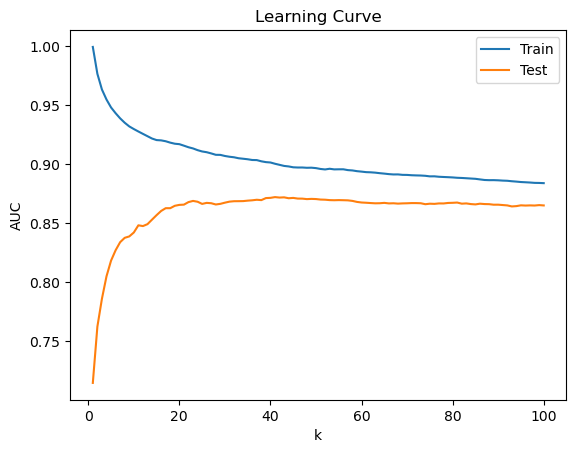

In [66]:
# Analyizing Learning Curve
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []
    
    for i in param_values:
        model = KNeighborsClassifier(n_neighbors = i)
        model.fit(X_train, y_train)
        
        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)
        
        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)
        
        print('param value: ' + str(i) + '; train:' + str(train_auc) + '; test:' + str(test_auc))
        
    plt.plot(param_values, train_scores, label = 'Train')
    plt.plot(param_values, test_scores, label = 'Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()
    
param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

### AdaBoost

In [67]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
eval_classification(clf)

Accuracy Score(Train set): 0.89
Precision Score (Train set):0.67
Recall Score (Train set):0.59
F1 Score (Train set):0.63

Accuracy Score(Test set): 0.89
Precision Score (Test set):0.67
Recall Score (Test set):0.59
F1 Score (Test set):0.62

ROC AUC Score (Train-proba): 0.92
ROC AUC Score (Test-proba): 0.91


In [68]:
# Using data train oversampling with smote(0.5)
clf = AdaBoostClassifier()
clf.fit(X_smote, y_smote)
eval_classification(clf)

Accuracy Score(Train set): 0.88
Precision Score (Train set):0.61
Recall Score (Train set):0.71
F1 Score (Train set):0.66

Accuracy Score(Test set): 0.88
Precision Score (Test set):0.59
Recall Score (Test set):0.70
F1 Score (Test set):0.64

ROC AUC Score (Train-proba): 0.92
ROC AUC Score (Test-proba): 0.91


In [69]:
# List of Hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000)],
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],
                       algorithm = ['SAMME.R'])

In [70]:
# Init model
ab = AdaBoostClassifier(random_state = 8)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state = 8, cv = 5, scoring = 'recall')
ab_tuned.fit(X_smote, y_smote)
eval_classification(ab_tuned)

Accuracy Score(Train set): 0.87
Precision Score (Train set):0.56
Recall Score (Train set):0.81
F1 Score (Train set):0.66

Accuracy Score(Test set): 0.87
Precision Score (Test set):0.56
Recall Score (Test set):0.80
F1 Score (Test set):0.66

ROC AUC Score (Train-proba): 0.86
ROC AUC Score (Test-proba): 0.85


### XGBoost

In [71]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy Score(Train set): 0.98
Precision Score (Train set):0.98
Recall Score (Train set):0.87
F1 Score (Train set):0.93

Accuracy Score(Test set): 0.89
Precision Score (Test set):0.69
Recall Score (Test set):0.58
F1 Score (Test set):0.63

ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.92


In [72]:
# Using data train oversampling with smote(0.5)
xg = XGBClassifier()
xg.fit(X_smote, y_smote)
eval_classification(xg)

Accuracy Score(Train set): 0.98
Precision Score (Train set):0.95
Recall Score (Train set):0.90
F1 Score (Train set):0.93

Accuracy Score(Test set): 0.89
Precision Score (Test set):0.63
Recall Score (Test set):0.66
F1 Score (Test set):0.64

ROC AUC Score (Train-proba): 0.99
ROC AUC Score (Test-proba): 0.92


In [73]:
# Hyperparameter Tuning
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 15, num = 5)],
                    'min_child_weight' : [int(x) for x in np.linspace(50, 100, num = 50)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 15)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    #'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 15)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 15)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 15)]
                    }

In [74]:
# Initiation model
xg = XGBClassifier()
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv = 5, random_state = 8, scoring = 'precision')
xg_tuned.fit(X_smote, y_smote)
eval_classification(xg_tuned)

Accuracy Score(Train set): 0.91
Precision Score (Train set):0.70
Recall Score (Train set):0.77
F1 Score (Train set):0.73

Accuracy Score(Test set): 0.88
Precision Score (Test set):0.61
Recall Score (Test set):0.69
F1 Score (Test set):0.65

ROC AUC Score (Train-proba): 0.95
ROC AUC Score (Test-proba): 0.92


### Random Forest

In [75]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy Score(Train set): 1.00
Precision Score (Train set):1.00
Recall Score (Train set):1.00
F1 Score (Train set):1.00

Accuracy Score(Test set): 0.89
Precision Score (Test set):0.70
Recall Score (Test set):0.56
F1 Score (Test set):0.62

ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.91


In [76]:
# Using data train oversampling with smote(0.5)
rf = RandomForestClassifier()
rf.fit(X_smote, y_smote)
eval_classification(rf)

Accuracy Score(Train set): 1.00
Precision Score (Train set):1.00
Recall Score (Train set):1.00
F1 Score (Train set):1.00

Accuracy Score(Test set): 0.89
Precision Score (Test set):0.62
Recall Score (Test set):0.71
F1 Score (Test set):0.66

ROC AUC Score (Train-proba): 1.00
ROC AUC Score (Test-proba): 0.91


In [77]:
# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 50)]
n_estimators = [110]
# Number of criterion to consider at every split
criterion = ['gini', 'entropy']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(2, 100, num = 50)]
# max_depth.append(None)
max_depth = [int(x) for x in np.linspace(5, 20, num = 50)]
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(20,30,10)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(20,30,10)]

hyperparameters = dict(n_estimators=n_estimators,criterion=criterion, max_depth= max_depth,min_samples_split = min_samples_split,min_samples_leaf=min_samples_leaf)
rf = RandomForestClassifier(random_state=8)
rs = RandomizedSearchCV(rf,hyperparameters, scoring='roc_auc',random_state=8,cv=5)
rs.fit(X_smote, y_smote)
eval_classification(rs)

Accuracy Score(Train set): 0.90
Precision Score (Train set):0.64
Recall Score (Train set):0.80
F1 Score (Train set):0.71

Accuracy Score(Test set): 0.88
Precision Score (Test set):0.60
Recall Score (Test set):0.77
F1 Score (Test set):0.67

ROC AUC Score (Train-proba): 0.95
ROC AUC Score (Test-proba): 0.92


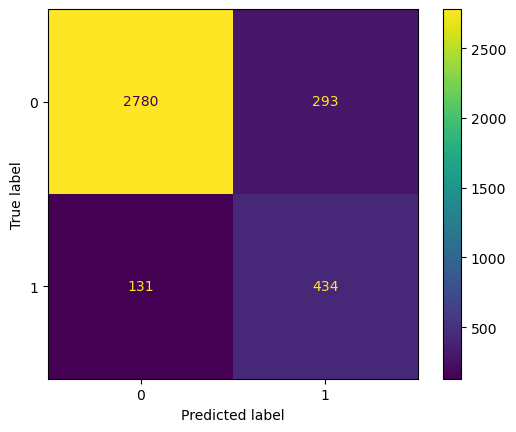

In [78]:
# Hyperparameter Tuning
hyperparameters = dict(n_estimators=n_estimators,criterion=criterion, max_depth= max_depth,min_samples_split = min_samples_split,min_samples_leaf=min_samples_leaf)
rf = RandomForestClassifier(random_state=8)
rs = RandomizedSearchCV(rf,hyperparameters, scoring='roc_auc',random_state=8,cv=5)
rs.fit(X_smote, y_smote)

predictions = rs.predict(X_test)

cm = confusion_matrix(y_test, predictions, labels=rs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rs.classes_)
disp.plot()
plt.show()

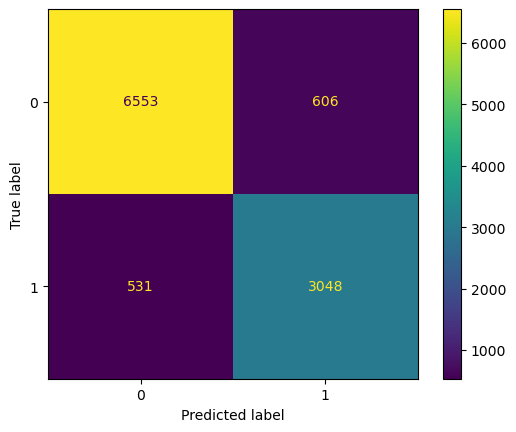

In [79]:
hyperparameters = dict(n_estimators=n_estimators,criterion=criterion, max_depth= max_depth,min_samples_split = min_samples_split,min_samples_leaf=min_samples_leaf)
rf = RandomForestClassifier(random_state=8)
rs = RandomizedSearchCV(rf,hyperparameters, scoring='roc_auc',random_state=8,cv=5)
rs.fit(X_smote, y_smote)

predictions = rs.predict(X_smote)

cm = confusion_matrix(y_smote, predictions, labels=rs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rs.classes_)
disp.plot()
plt.show()

## Feature Importance

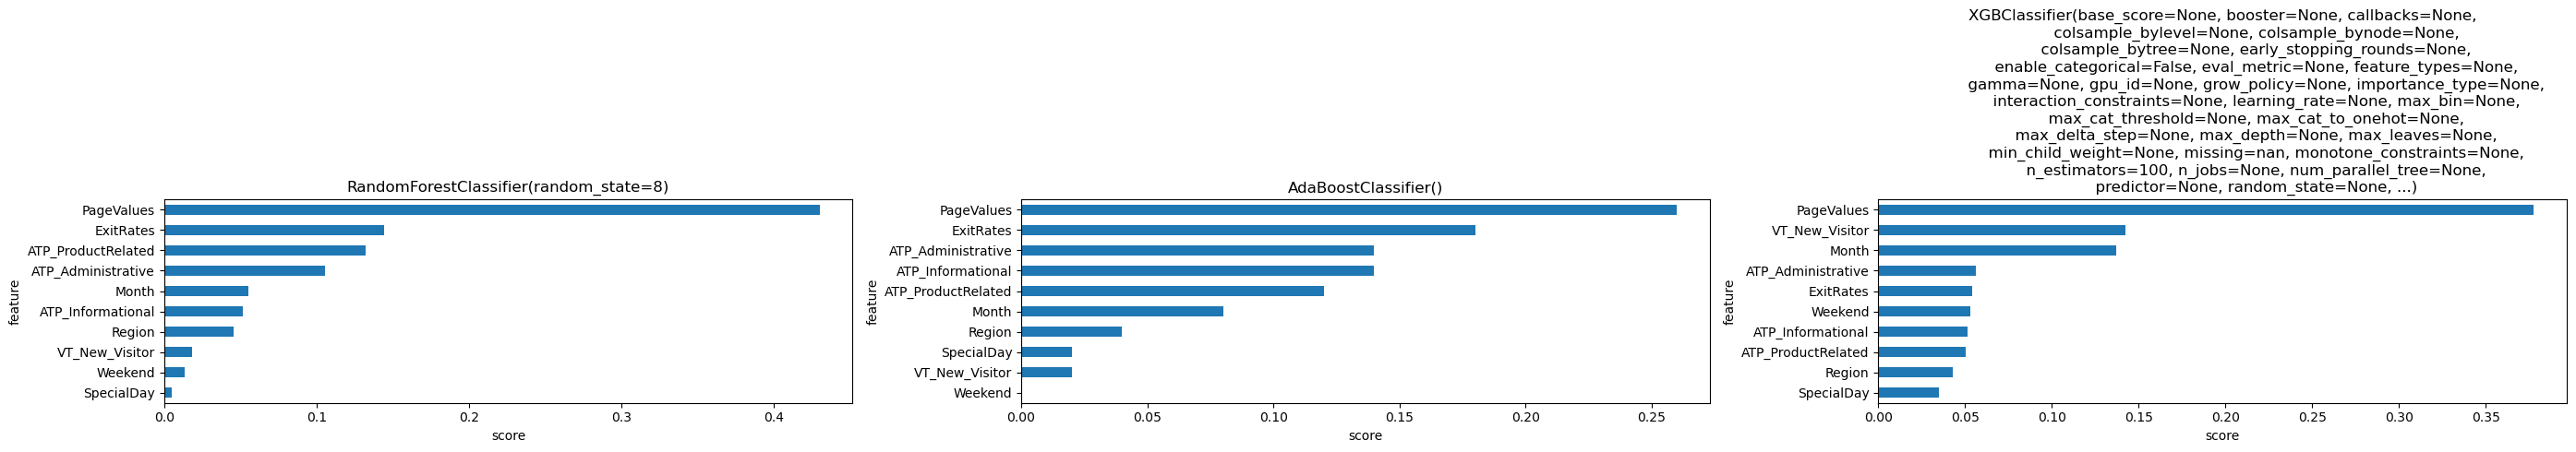

In [80]:
rf = RandomForestClassifier(random_state = 8)
clf = AdaBoostClassifier()
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

model = [rf, clf, xgb]
for i in range(0, len(model)):
  plt.subplot(1, 3, i+1)
  model[i].fit(X_train, y_train)
  show_feature_importance(model[i])
  plt.tight_layout()

In [81]:
import shap

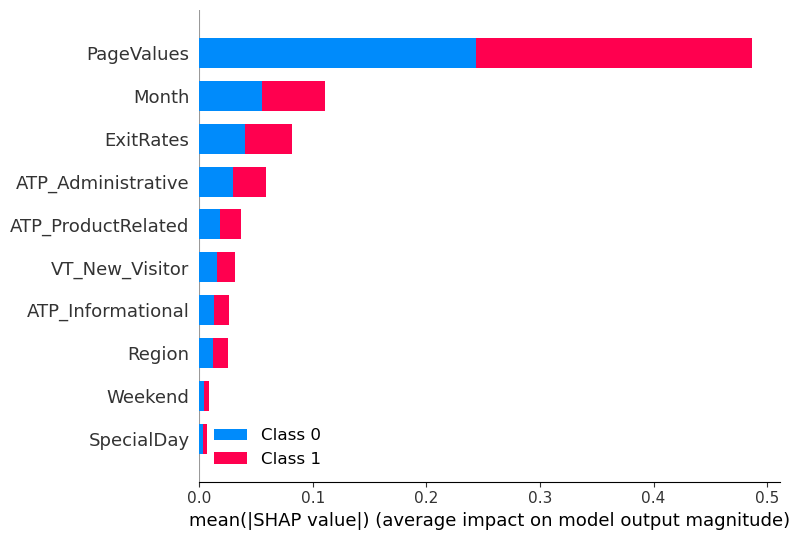

In [82]:
random_forest = RandomForestClassifier()
random_forest.fit(X_smote, y_smote)
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

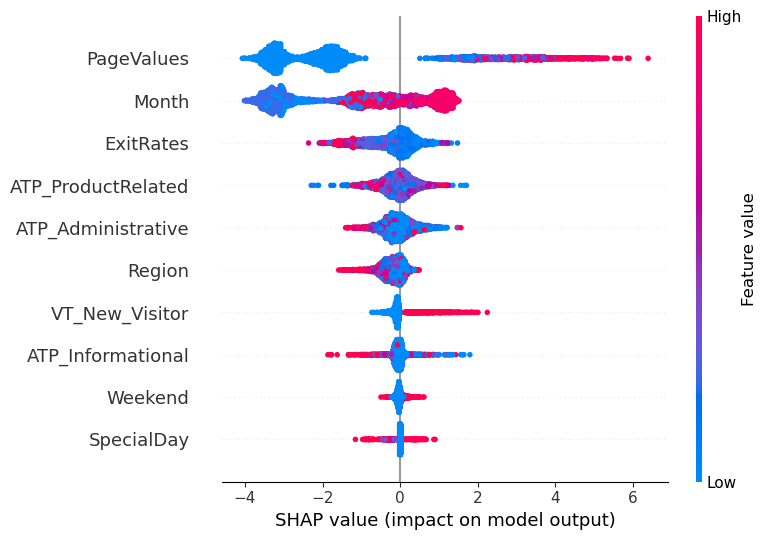

In [83]:
xgb = XGBClassifier()
xgb.fit(X_smote, y_smote)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Exact explainer: 1001it [00:27, 33.00it/s]                          


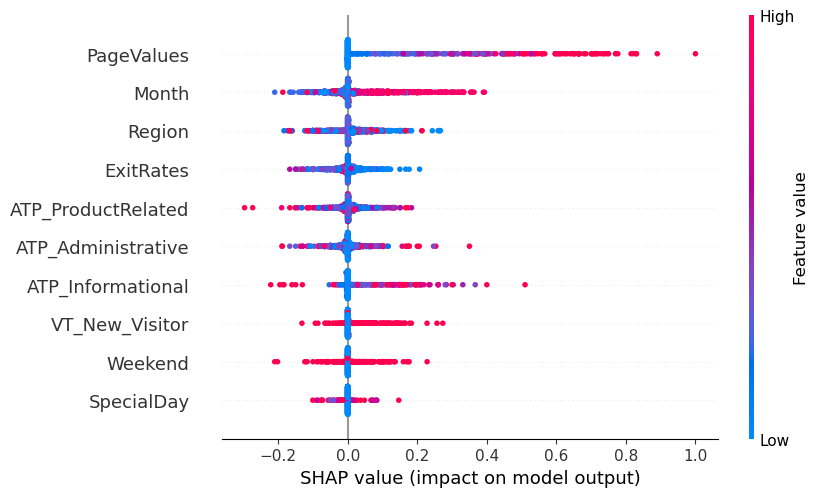

In [84]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
f = lambda x: knn.predict_proba(x)[:, 1]
med = X_train.median().values.reshape((1, X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_test.iloc[0:1000,:])
shap.plots.beeswarm(shap_values)

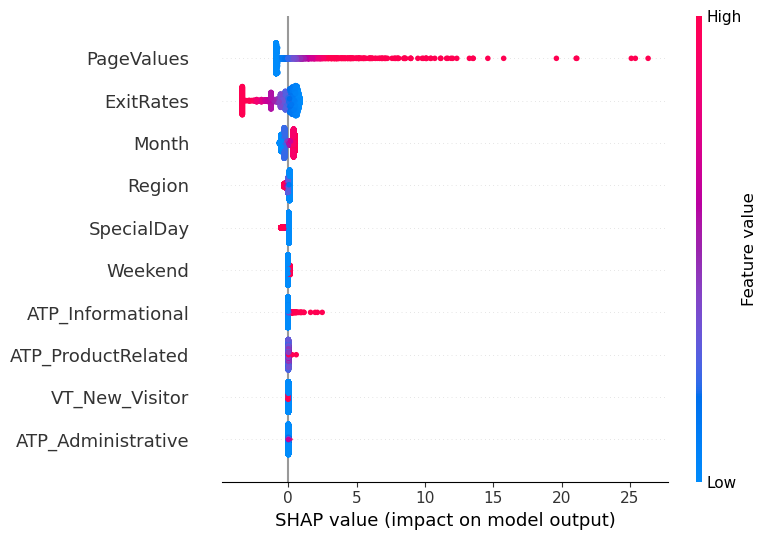

In [85]:
logreg = LogisticRegression()
logreg.fit(X_smote, y_smote)
explainer = shap.LinearExplainer(logreg, X_smote)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)